In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
import scipy
from scipy import stats
from scipy.stats import zscore
import sklearn
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.preprocessing import OrdinalEncoder


In [2]:
df=pd.read_csv("WA_Fn-UseC_-HR-Employee-Attrition.csv")
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EmployeeNumber  ...  RelationshipSatisfaction StandardHours  \
0                  1  ...                         1            80   
1                  2  ...                         4            80   
2                  4  ...                         2            80   
3                  5  ...                         3            80   
4                  7  ...                         4            80   
...              ...  ...                       ...           ...   
1465            2061  ...                         3            80   
1466            2062  ...                         1            80   
1467            2064  ...                         2            80   
1468            2065  ...                         4            80   
1469            2068  ...                         1            80   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                    0                  8                      0   
1                    1                 10                      3   
2                    0                  7                      3   
3                    0                  8                      3   
4                    1                  6                      3   
...                ...                ...                    ...   
1465                 1                 17                      3   
1466                 1                  9                      5   
1467                 1                  6                      0   
1468                 0                 17                      3   
1469                 0                  6                      3   

     WorkLifeBalance  YearsAtCompany YearsInCurrentRole  \
0                  1               6                  4   
1                  3              10                  7   
2                  3               0                  0   
3                  3               8                  7   
4                  3               2                  2   
...              ...             ...                ...   
1465               3               5                  2   
1466               3               7                  7   
1467               3               6                  2   
1468               2               9    

In [3]:
df.shape

(1470, 35)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

Here we can see that there are 9 columns with object datatype,and 26 with int datatype. Moreover all the columns are not null

In [5]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   ...  RelationshipSatisfaction StandardHours  StockOptionLevel  \
0  ...                         1            80                 0   
1  ...                         4            80                 1   
2  ...                         2            80                 0   
3  ...                         3            80                 0   
4  ...                         4            80                 1   

   TotalWorkingYears  TrainingTimesLastYear WorkLifeBalance  YearsAtCompany  \
0                  8                      0               1               6   
1                 10                      3               3              10   
2                  7                      3               3               0   
3                  8                      3               3               8   
4                  6                      3               3               2   

  YearsInCurrentRole  YearsSinceLastPromotion  YearsWithCurrManager  
0                  4                        0                     5  
1                  7                        1                     7  
2                  0                        0                     0  
3                  7                        3                     0  
4                  2                        2                     2  

[5 rows x 35 columns]

In [6]:
df.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

<Axes: >

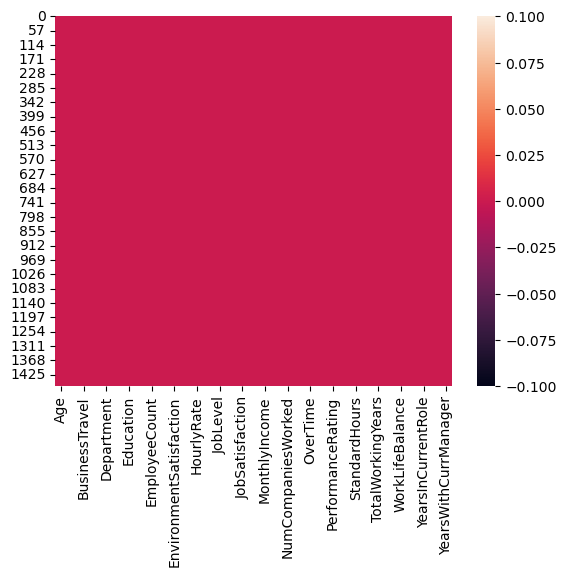

In [7]:
sns.heatmap(df.isnull())

In [8]:
df.columns.tolist()

['Age',
 'Attrition',
 'BusinessTravel',
 'DailyRate',
 'Department',
 'DistanceFromHome',
 'Education',
 'EducationField',
 'EmployeeCount',
 'EmployeeNumber',
 'EnvironmentSatisfaction',
 'Gender',
 'HourlyRate',
 'JobInvolvement',
 'JobLevel',
 'JobRole',
 'JobSatisfaction',
 'MaritalStatus',
 'MonthlyIncome',
 'MonthlyRate',
 'NumCompaniesWorked',
 'Over18',
 'OverTime',
 'PercentSalaryHike',
 'PerformanceRating',
 'RelationshipSatisfaction',
 'StandardHours',
 'StockOptionLevel',
 'TotalWorkingYears',
 'TrainingTimesLastYear',
 'WorkLifeBalance',
 'YearsAtCompany',
 'YearsInCurrentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager']

In [9]:
df.nunique()

Age                           43
Attrition                      2
BusinessTravel                 3
DailyRate                    886
Department                     3
DistanceFromHome              29
Education                      5
EducationField                 6
EmployeeCount                  1
EmployeeNumber              1470
EnvironmentSatisfaction        4
Gender                         2
HourlyRate                    71
JobInvolvement                 4
JobLevel                       5
JobRole                        9
JobSatisfaction                4
MaritalStatus                  3
MonthlyIncome               1349
MonthlyRate                 1427
NumCompaniesWorked            10
Over18                         1
OverTime                       2
PercentSalaryHike             15
PerformanceRating              2
RelationshipSatisfaction       4
StandardHours                  1
StockOptionLevel               4
TotalWorkingYears             40
TrainingTimesLastYear          7
WorkLifeBa

Employee Number is the unique id assigned to each employee hence we can drop that column. Attrition has only 2 values which makes it a classification problem

In [10]:
df=df.drop('EmployeeNumber', axis=1)

In [11]:
df

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EmployeeCount  \
0                    1          2  Life Sciences              1   
1                    8          1  Life Sciences              1   
2                    2          2          Other              1   
3                    3          4  Life Sciences              1   
4                    2          1        Medical              1   
...                ...        ...            ...            ...   
1465                23          2        Medical              1   
1466                 6          1        Medical              1   
1467                 4          3  Life Sciences              1   
1468                 2          3        Medical              1   
1469                 8          3        Medical              1   

      EnvironmentSatisfaction  ... RelationshipSatisfaction  StandardHours  \
0                           2  ...                        1             80   
1                           3  ...                        4             80   
2                           4  ...                        2             80   
3                           4  ...                        3             80   
4                           1  ...                        4             80   
...                       ...  ...                      ...            ...   
1465                        3  ...                        3             80   
1466                        4  ...                        1             80   
1467                        2  ...                        2             80   
1468                        4  ...                        4             80   
1469                        2  ...                        1             80   

      StockOptionLevel  TotalWorkingYears TrainingTimesLastYear  \
0                    0                  8                     0   
1                    1                 10                     3   
2                    0                  7                     3   
3                    0                  8                     3   
4                    1                  6                     3   
...                ...                ...                   ...   
1465                 1                 17                     3   
1466                 1                  9                     5   
1467                 1                  6                     0   
1468                 0                 17                     3   
1469                 0                  6                     3   

      WorkLifeBalance YearsAtCompany  YearsInCurrentRole  \
0                   1              6                   4   
1                   3             10                   7   
2                   3              0                   0   
3                   3              8                   7   
4                   3              2                   2   
...               ...            ...                 ...   
1465                3              5                   2   
1466                3              7                  

In [12]:
df.describe().T

count          mean          std     min     25%  \
Age                       1470.0     36.923810     9.135373    18.0    30.0   
DailyRate                 1470.0    802.485714   403.509100   102.0   465.0   
DistanceFromHome          1470.0      9.192517     8.106864     1.0     2.0   
Education                 1470.0      2.912925     1.024165     1.0     2.0   
EmployeeCount             1470.0      1.000000     0.000000     1.0     1.0   
EnvironmentSatisfaction   1470.0      2.721769     1.093082     1.0     2.0   
HourlyRate                1470.0     65.891156    20.329428    30.0    48.0   
JobInvolvement            1470.0      2.729932     0.711561     1.0     2.0   
JobLevel                  1470.0      2.063946     1.106940     1.0     1.0   
JobSatisfaction           1470.0      2.728571     1.102846     1.0     2.0   
MonthlyIncome             1470.0   6502.931293  4707.956783  1009.0  2911.0   
MonthlyRate               1470.0  14313.103401  7117.786044  2094.0  8047.0   
NumCompaniesWorked        1470.0      2.693197     2.498009     0.0     1.0   
PercentSalaryHike         1470.0     15.209524     3.659938    11.0    12.0   
PerformanceRating         1470.0      3.153741     0.360824     3.0     3.0   
RelationshipSatisfaction  1470.0      2.712245     1.081209     1.0     2.0   
StandardHours             1470.0     80.000000     0.000000    80.0    80.0   
StockOptionLevel          1470.0      0.793878     0.852077     0.0     0.0   
TotalWorkingYears         1470.0     11.279592     7.780782     0.0     6.0   
TrainingTimesLastYear     1470.0      2.799320     1.289271     0.0     2.0   
WorkLifeBalance           1470.0      2.761224     0.706476     1.0     2.0   
YearsAtCompany            1470.0      7.008163     6.126525     0.0     3.0   
YearsInCurrentRole        1470.0      4.229252     3.623137     0.0     2.0   
YearsSinceLastPromotion   1470.0      2.187755     3.222430     0.0     0.0   
YearsWithCurrManager      1470.0      4.123129     3.568136     0.0     2.0   

                              50%       75%      max  
Age                          36.0     43.00     60.0  
DailyRate                   802.0   1157.00   1499.0  
DistanceFromHome              7.0     14.00     29.0  
Education                     3.0      4.00      5.0  
EmployeeCount                 1.0      1.00      1.0  
EnvironmentSatisfaction       3.0      4.00      4.0  
HourlyRate                   66.0     83.75    100.0  
JobInvolvement                3.0      3.00      4.0  
JobLevel                      2.0      3.00      5.0  
JobSatisfaction               3.0      4.00      4.0  
MonthlyIncome              4919.0   8379.00  19999.0  
MonthlyRate               14235.5  20461.50  26999.0  
NumCompaniesWorked            2.0      4.00      9.0  
PercentSalaryHike            14.0     18.00     25.0  
PerformanceRating             3.0      3.00      4.0  
RelationshipSatisfaction      3.0      4.00      4.0  
StandardHours                80.0     80.00     80.0  
StockOptionLevel              1.0      1.00      3.0  
TotalWorkingYears            10.0     15.00     40.0  
TrainingTimesLastYear         3.0      3.00      6.0  
WorkLifeBalance               3.0      3.00      4.0  
YearsAtCompany                5.0      9.00     40.0  
YearsInCurrentRole            3.0      7.00     18.0  
YearsSinceLastPromotion       1.0      3.00     15.0  
YearsWithCurrManager          3.0      7.00     17.0

Above we can see that:
1.) The count in each column is 1470 which indicates the absence of null values.
2.) In Age, Daily Rate,Distance from home,Stock option Level,Total Working years,years at company,years in current role,year since last promotion,years with current manager have mean greater than median which means tehre is presence of positive skewness.
3.)In Education,Environment Satisfaction,Hourly rate,job involvement, job satisfaction, relationship satisfaction have median greater than mean which indicates presence of negative skewness.
4.) Standard Deviation is high in Daily Rate and difference between 75th percentile and max value is high which indiactes the presence of outliers.
5.) Total working hours : difference in 75th percentile and max value is high which indicates the presence of outlier.
6.) Years at company: difference in 75th percentile and max value is high which indicates the presence of outlier.
7.) YearsSinceLastPromotion: difference in 75th percentile and max value is high which indicates the presence of outlier.
    

In [13]:
#Separating numerical and catagorical columns:
#Checking for catagorical column:
categorical=[]
numerical=[]
for i in df.dtypes.index:
    if df.dtypes[i]=="object":
        categorical.append(i)
    else:
        numerical.append(i)
print("Categorical Columns :",categorical)
print("Numerical Columns :",numerical)
        

Categorical Columns : ['Attrition', 'BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus', 'Over18', 'OverTime']
Numerical Columns : ['Age', 'DailyRate', 'DistanceFromHome', 'Education', 'EmployeeCount', 'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']


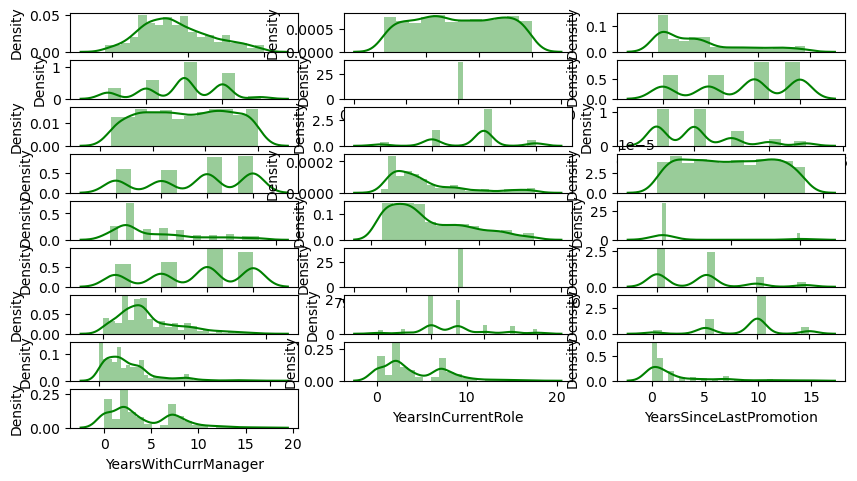

In [14]:
plt.figure(figsize=(10,6))
plotnumber=1
for col in numerical:
    if plotnumber<=29:
        ax=plt.subplot(10,3,plotnumber)
        sns.distplot(df[col],color='g')
    plotnumber+=1
plt.tight_layout()    

Above distribution curve shows the presence of positive and negative skewness in the dataset

Attrition
No     1233
Yes     237
dtype: int64

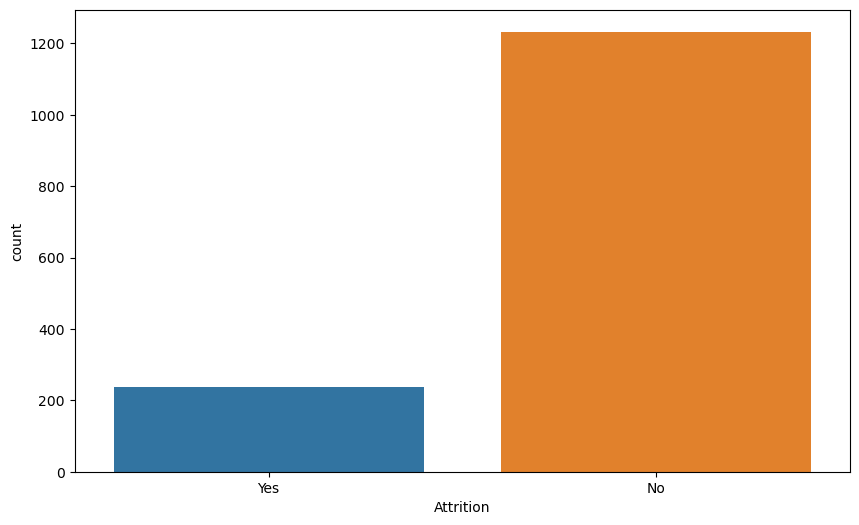

In [15]:
plt.figure(figsize=(10,6))
sns.countplot(x='Attrition',data=df)
df.value_counts('Attrition')

Above count plot shows the count of employees that stayed with the company and those who did not.Out of 1470 employees which were analysed 237 employees left the company. Hence the attrition rate during the said period is (237/1470)*100= 16.12%

BusinessTravel
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
dtype: int64

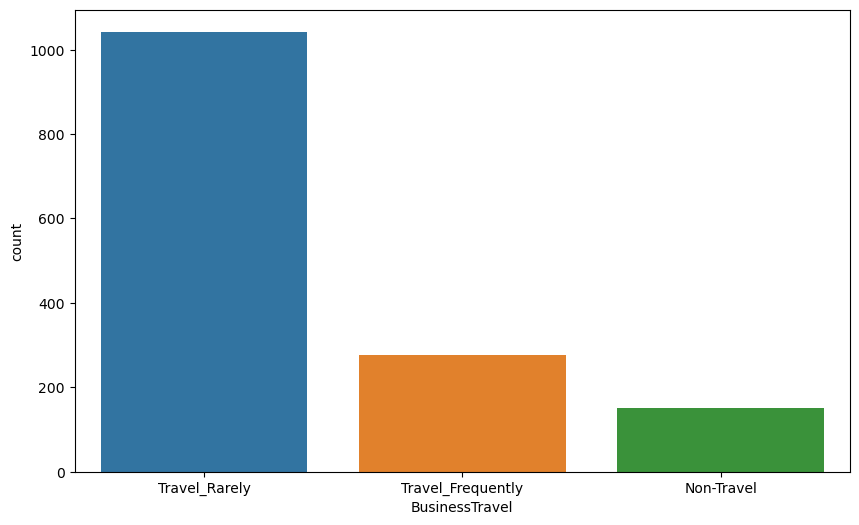

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(x='BusinessTravel',data=df)
df.value_counts('BusinessTravel')

Above count plot shows business related travel for employees whether they are travellers or not traveller.Highest number of employees in the dataset are rare travellers while least are non travellers

YearsInCurrentRole
2     372
0     244
7     222
3     135
4     104
8      89
9      67
1      57
6      37
5      36
10     29
11     22
13     14
14     11
12     10
15      8
16      7
17      4
18      2
dtype: int64

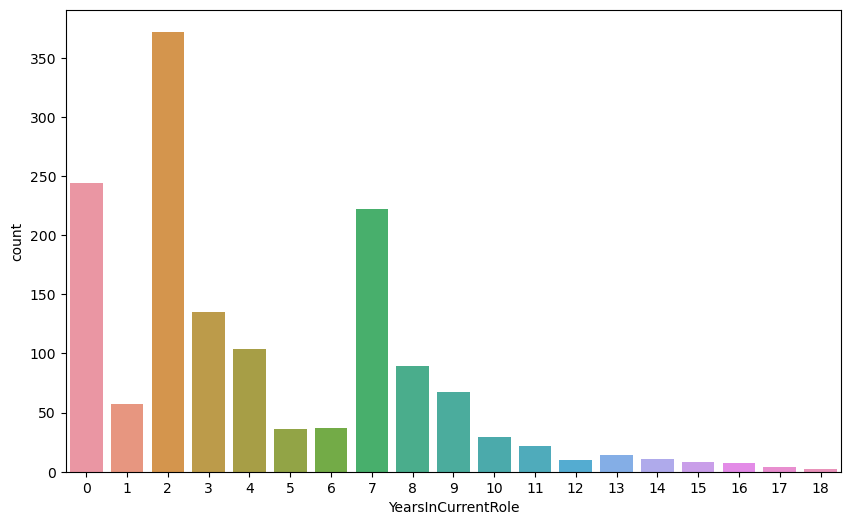

In [17]:
plt.figure(figsize=(10,6))
sns.countplot(x='YearsInCurrentRole',data=df)
df.value_counts('YearsInCurrentRole')

The above graph shows that the maximum number of employees have served minimum 2 yrs in the company.Also the average number of years served by the employees in IBM is 7.008 yrs as we have seen above in df.describe().


Age
35    78
34    77
36    69
31    69
29    68
32    61
30    60
38    58
33    58
40    57
37    50
27    48
28    48
42    46
39    42
45    41
41    40
26    39
44    33
46    33
43    32
50    30
24    26
25    26
47    24
49    24
55    22
53    19
48    19
51    19
52    18
54    18
22    16
56    14
23    14
58    14
21    13
20    11
59    10
19     9
18     8
60     5
57     4
dtype: int64

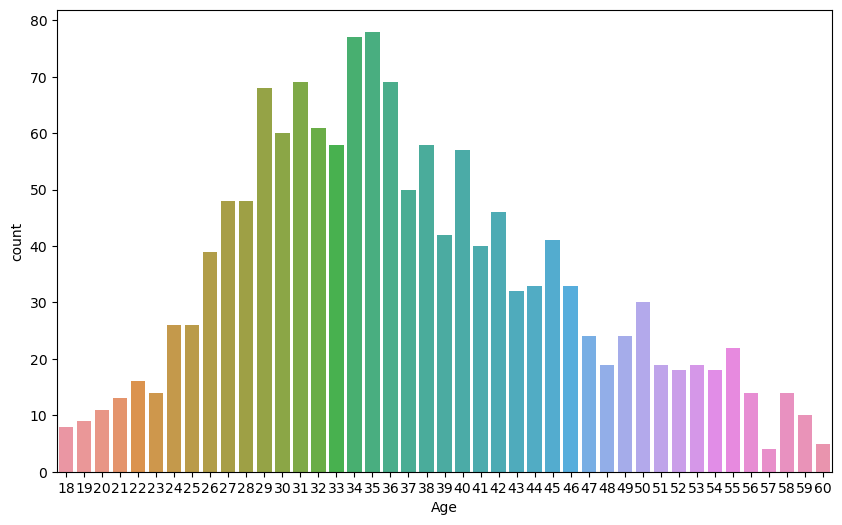

In [18]:
plt.figure(figsize=(10,6))
sns.countplot(x='Age',data=df)
df.value_counts('Age')

Above graph shows the destribution of age in IBM while data was taken. 78 of employees are of 35 yrs of age and only 4 employees are57 yrsof age. Teh average age in the company is 36.92 yrs

Gender
Male      882
Female    588
dtype: int64

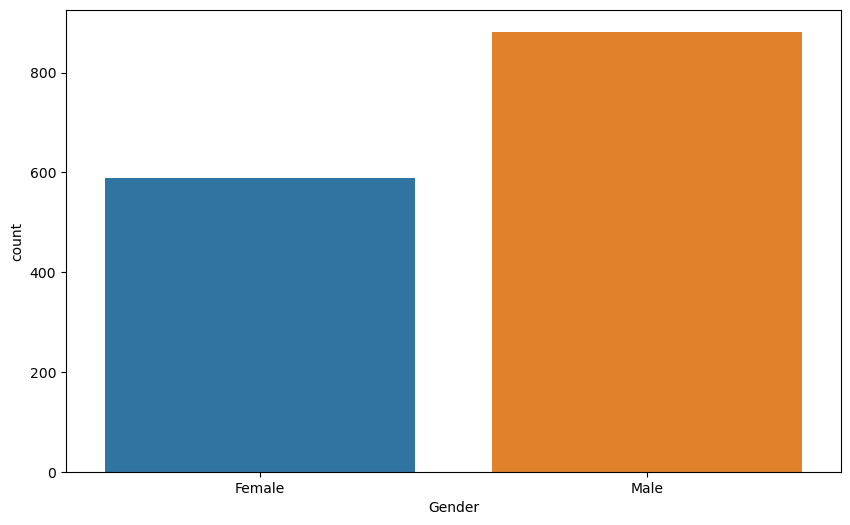

In [19]:
plt.figure(figsize=(10,6))
sns.countplot(x='Gender',data=df)
df.value_counts('Gender')

There are 882 Males and 588 Females in the dataset

Department
Research & Development    961
Sales                     446
Human Resources            63
dtype: int64

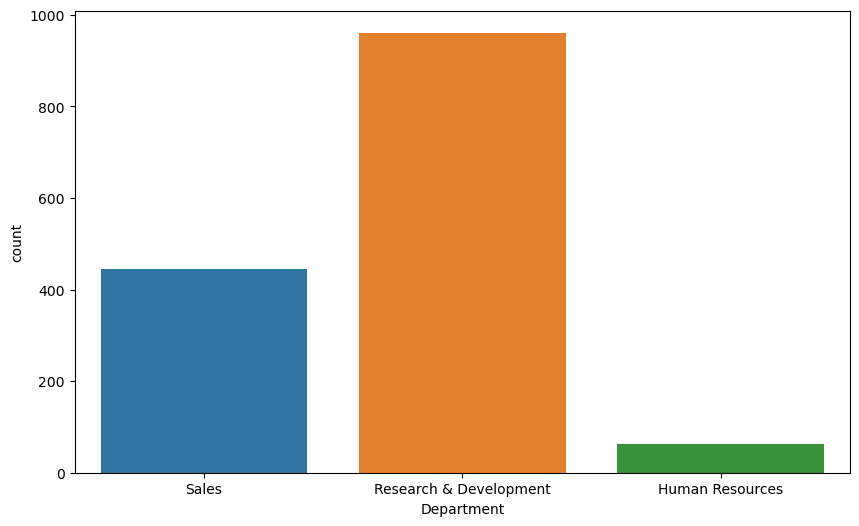

In [20]:
plt.figure(figsize=(10,6))
sns.countplot(x='Department',data=df)
df.value_counts('Department')

In the dataset there are 961 employees from R&D, 446 from Sales and 63 from HR department. Since the majority of employees are concentrated in R&D, it indicates that IBM is more focued on product or service enhancement for serving the clients better.

MaritalStatus
Married     673
Single      470
Divorced    327
dtype: int64

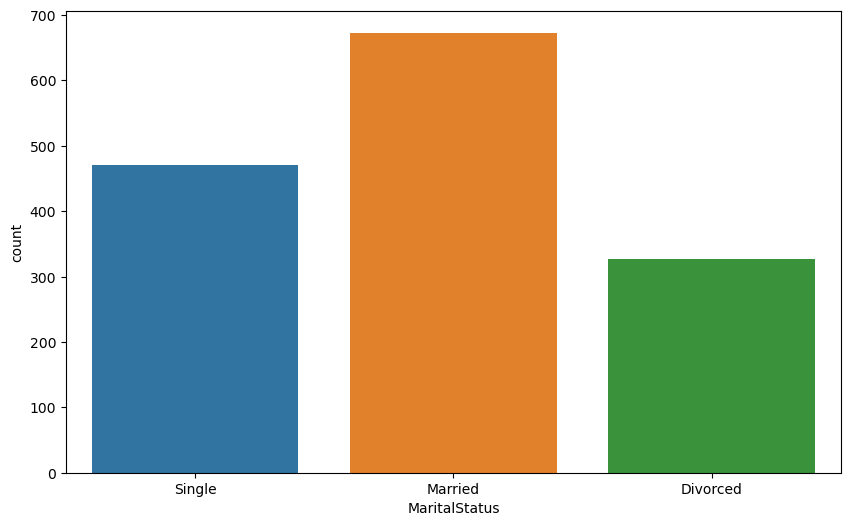

In [21]:
plt.figure(figsize=(10,6))
sns.countplot(x='MaritalStatus',data=df)
df.value_counts('MaritalStatus')

In the dataset out of 1470 employees 673 are married,470 are Single and 327 are divorced

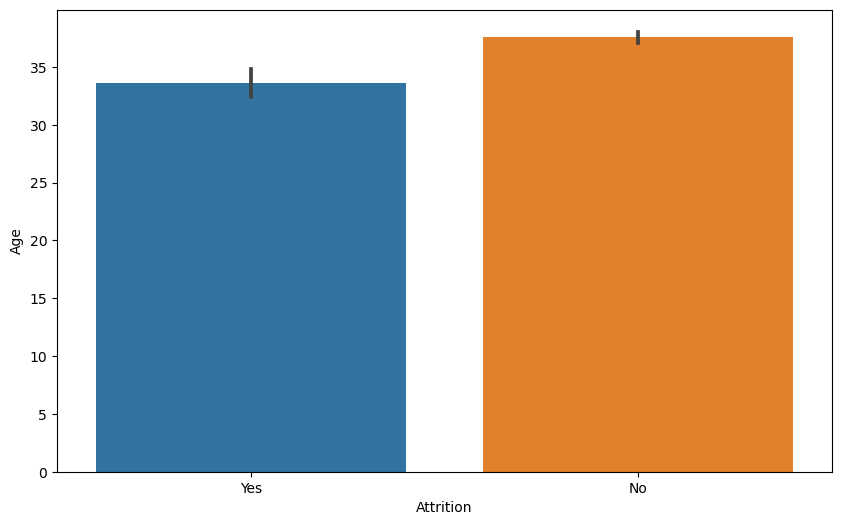

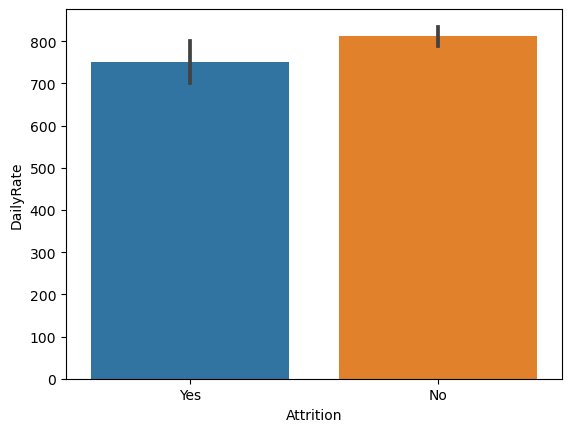

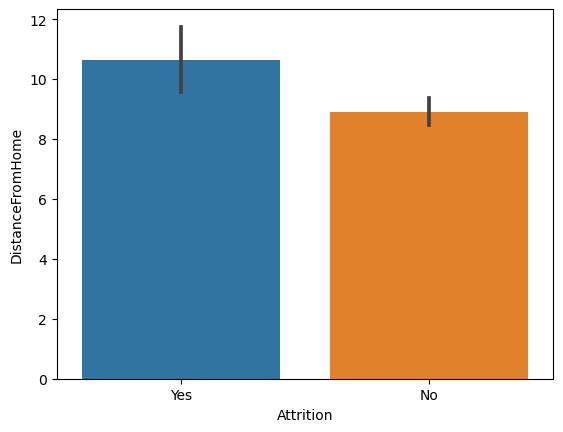

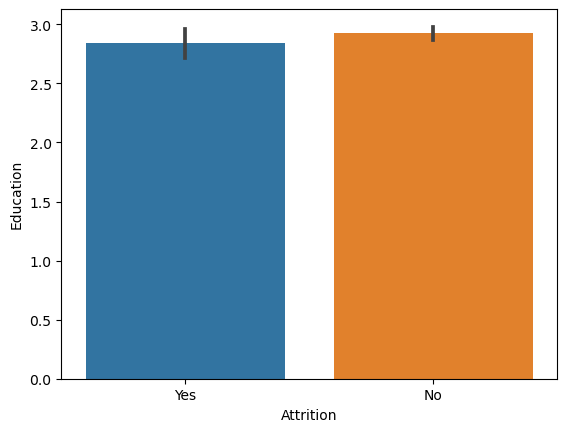

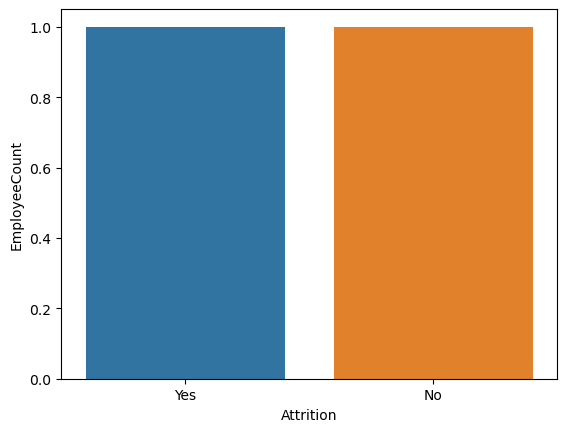

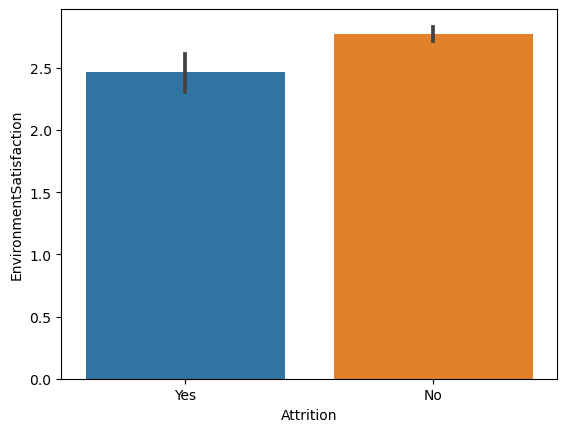

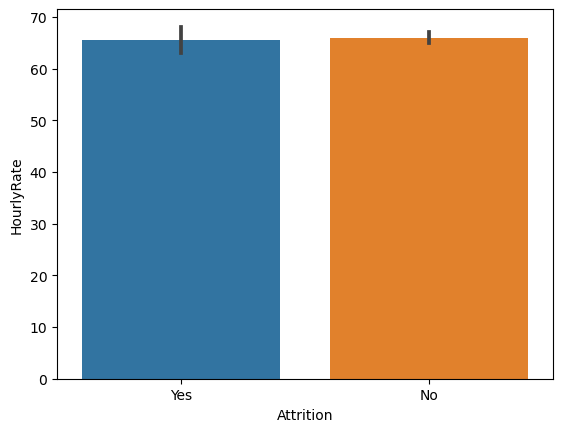

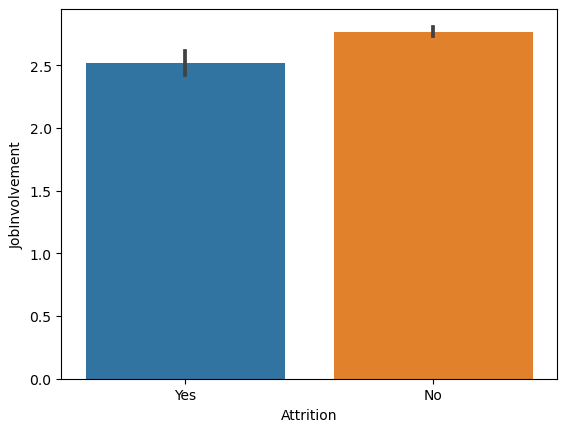

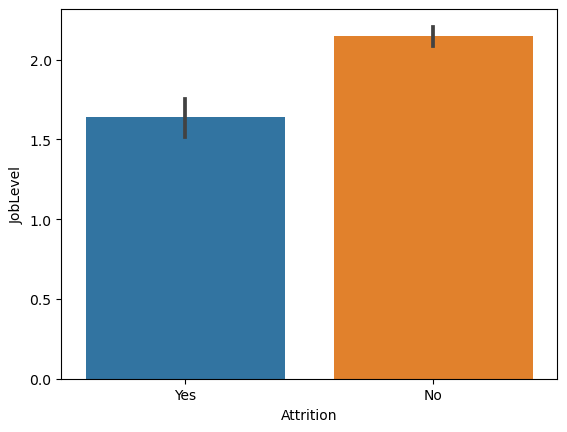

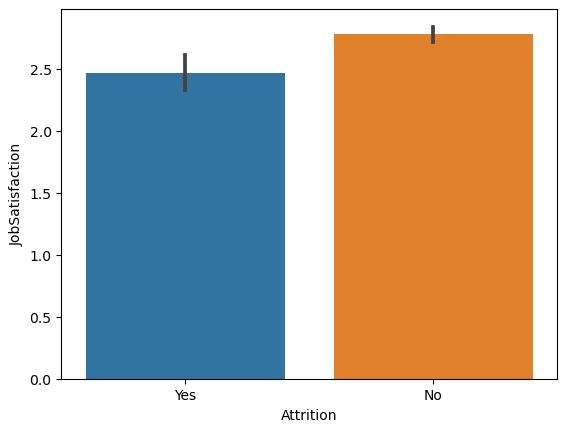

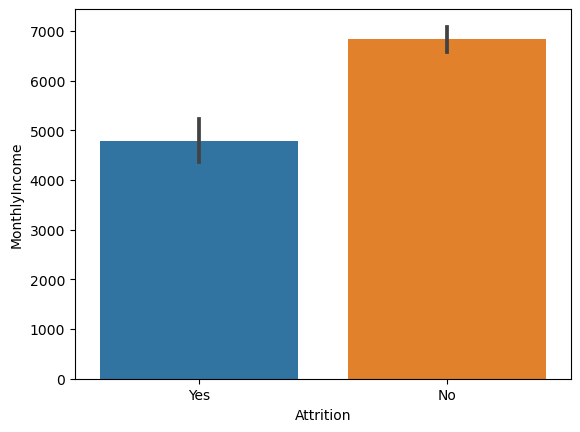

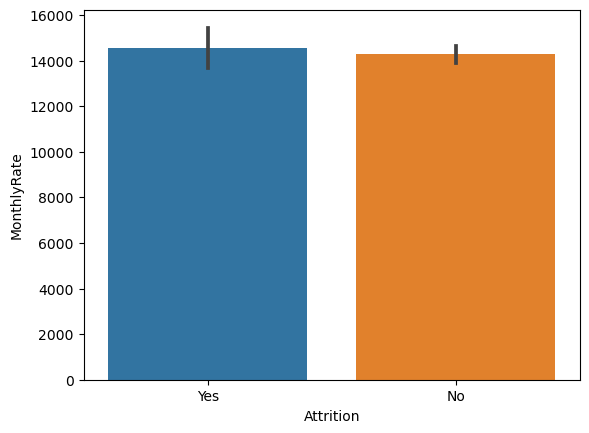

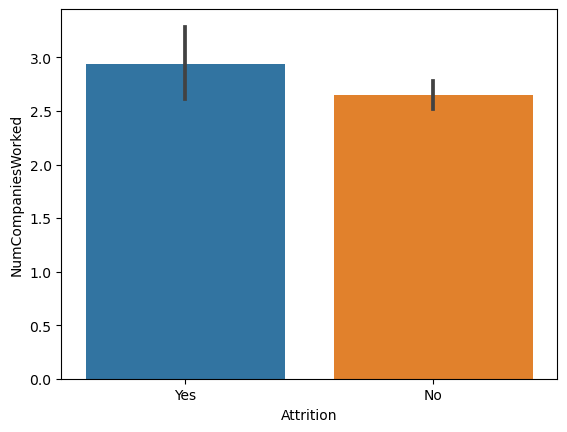

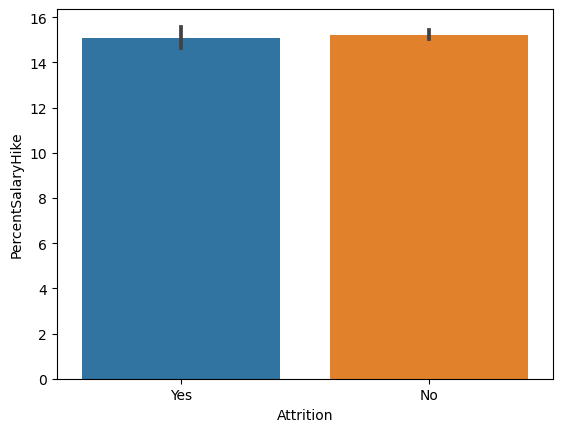

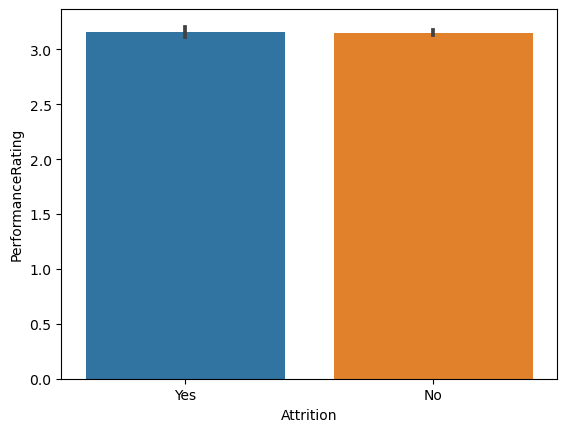

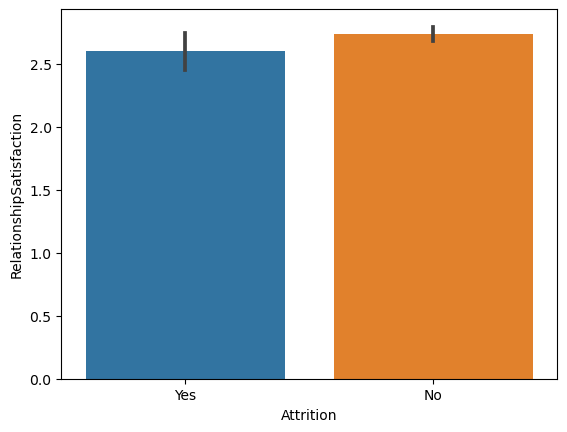

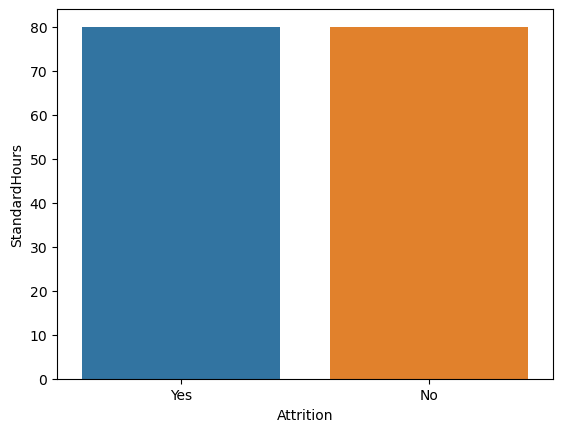

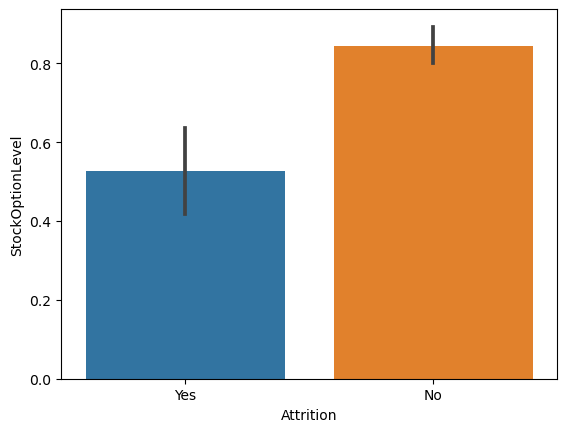

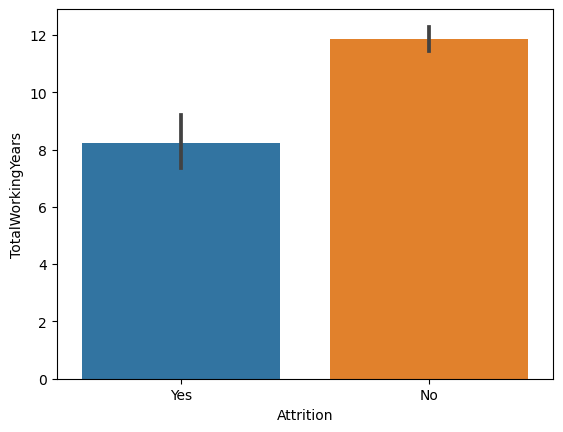

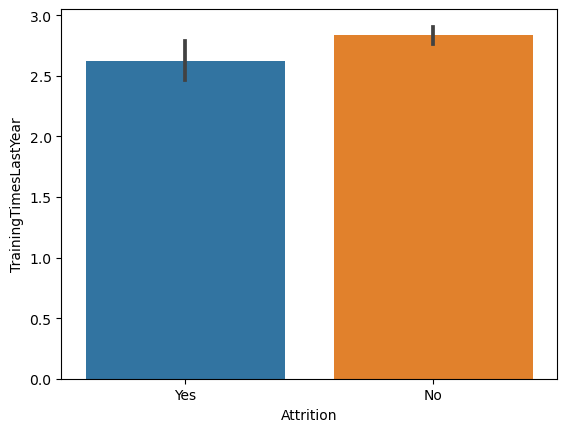

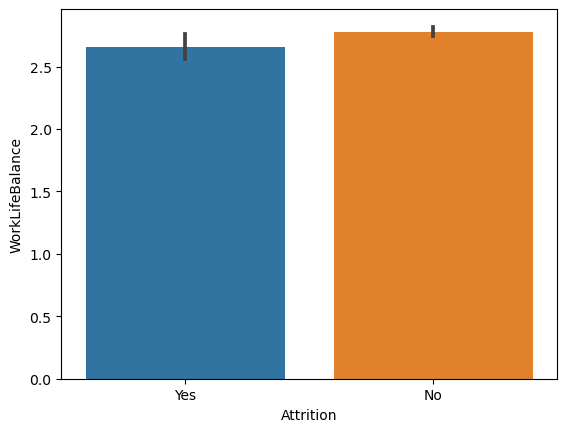

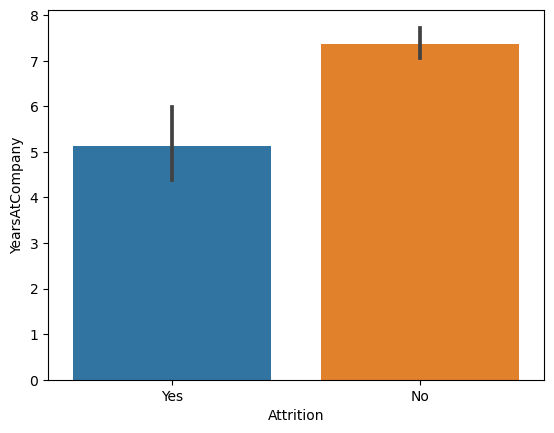

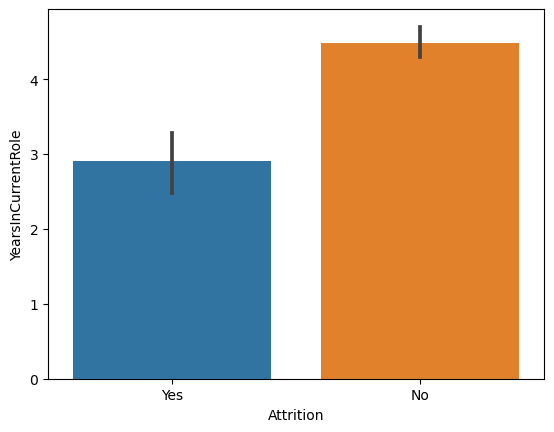

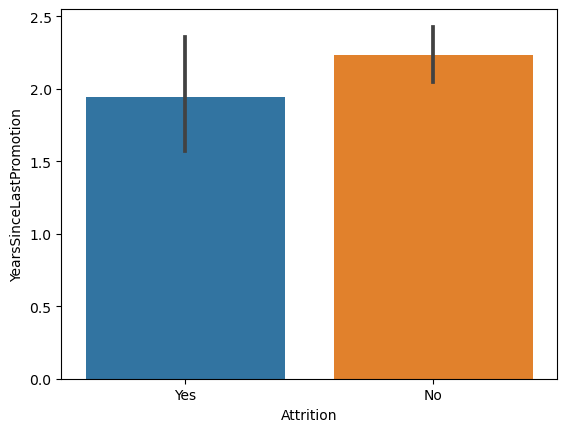

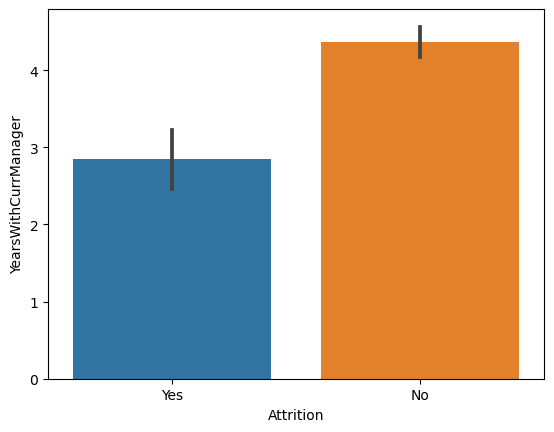

<Figure size 640x480 with 0 Axes>

In [22]:
 plt.figure(figsize=(10,6))
z=1
for i in numerical:
    if z<=29:
        sns.barplot(x='Attrition',y=i,data=df)
        plt.show()
        z+=1
plt.tight_layout()

Above we can observe that:
    1.) Attrition is more with employees with age between 30-35 yrs. Higher the age less is the attrition
    2.) Attrition is more with employees who have less Daily Rate.
    3.) Attrition is more when the distance of employees place of residence is more from the office.
    4.) Higher the education of the employee, lesser is the attrition rate.
    5.) Employee count does not have any significant impact on attrition rate.
    6.) Attrition is more when employees are not satisfied with Environment Satisfaction.
    7.) Hourly Rate has no significant impact on Attrition.
    8.) Attrition is less when job involvement is more.
    9.) The higher the job level the less is the attrition.
    10.) Higher the job satisfaction, lesser is the attrition.
    11.) Lesser the monthly income, higher is the attrition.
    12.) Monthly rate does not have much impact on the attrition.
    13.) Higher the number of companies changed by an employee, higher is the attrition.
    14.) Percent salary hike does not have much impact on the attrition.
    15.) Performace rating does not have much impact on the attrition rate.
    16.) Higher the relationship satisfaction us the attrition
    17.) Standard hours does not have much impat on the attrition.
    18.) Employees having stock options have lesser attrition rate.
    19.) Employees with higher experience have less attrition.
    20.) Employees who are trained more have less chances of attrition.
    21.) The employees with higher work life balance have less chance of attrition.
    22.) Those employees who have been in the company for a longer period of time have less chances of attrition.
    23.)Those employees who have been in the current role for a longer period of time have less chances of attrition.
    24.) Those employees who have spend more years in the company since last promotion have less chances of attrition.
    25.) Those employees who have spent more years with their current manager have less chances of attrition.

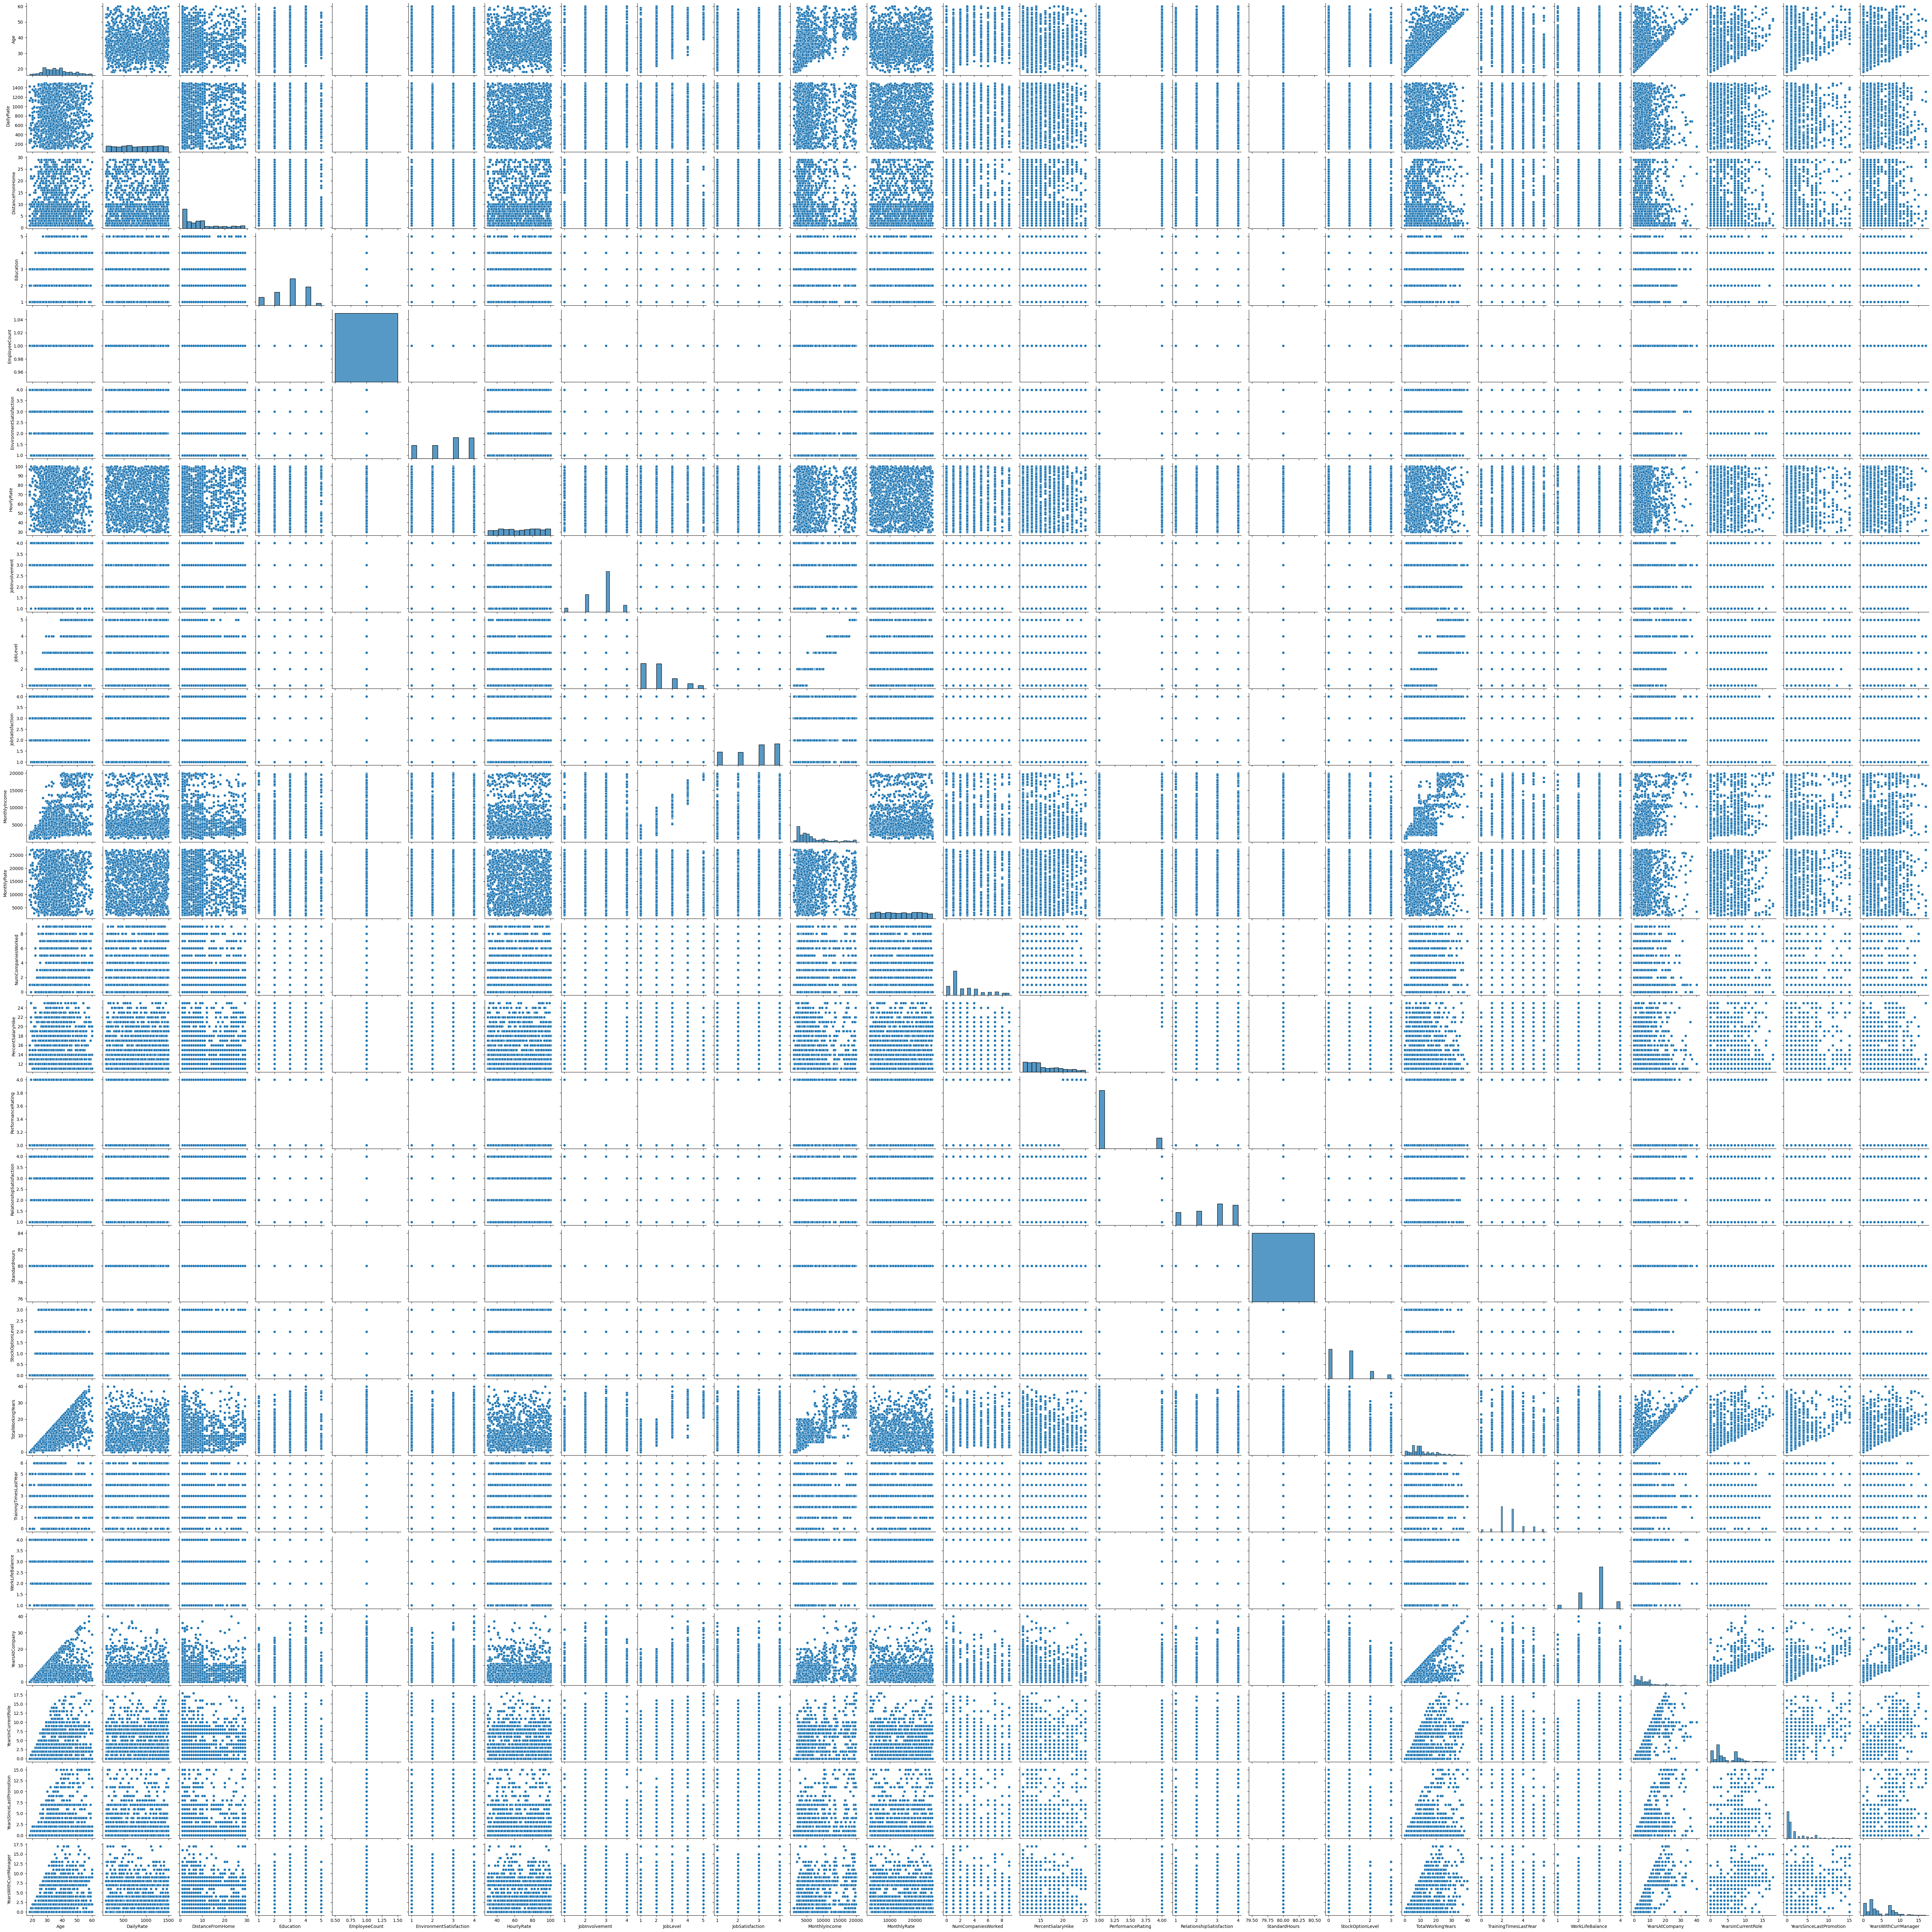

In [23]:
sns.pairplot(data=df)

In above pair plots we can see the correlation between all the columns

Employee Count does not add any value to the dataset hence we will be dropping that. Also standard hours is constant for each role hence we can drop that too

In [24]:
df=df.drop(['EmployeeCount','StandardHours'],axis=1)

In [25]:
df.shape

(1470, 32)

In [26]:
dfcor=df.corr()
dfcor

Age  DailyRate  DistanceFromHome  Education  \
Age                       1.000000   0.010661         -0.001686   0.208034   
DailyRate                 0.010661   1.000000         -0.004985  -0.016806   
DistanceFromHome         -0.001686  -0.004985          1.000000   0.021042   
Education                 0.208034  -0.016806          0.021042   1.000000   
EnvironmentSatisfaction   0.010146   0.018355         -0.016075  -0.027128   
HourlyRate                0.024287   0.023381          0.031131   0.016775   
JobInvolvement            0.029820   0.046135          0.008783   0.042438   
JobLevel                  0.509604   0.002966          0.005303   0.101589   
JobSatisfaction          -0.004892   0.030571         -0.003669  -0.011296   
MonthlyIncome             0.497855   0.007707         -0.017014   0.094961   
MonthlyRate               0.028051  -0.032182          0.027473  -0.026084   
NumCompaniesWorked        0.299635   0.038153         -0.029251   0.126317   
PercentSalaryHike         0.003634   0.022704          0.040235  -0.011111   
PerformanceRating         0.001904   0.000473          0.027110  -0.024539   
RelationshipSatisfaction  0.053535   0.007846          0.006557  -0.009118   
StockOptionLevel          0.037510   0.042143          0.044872   0.018422   
TotalWorkingYears         0.680381   0.014515          0.004628   0.148280   
TrainingTimesLastYear    -0.019621   0.002453         -0.036942  -0.025100   
WorkLifeBalance          -0.021490  -0.037848         -0.026556   0.009819   
YearsAtCompany            0.311309  -0.034055          0.009508   0.069114   
YearsInCurrentRole        0.212901   0.009932          0.018845   0.060236   
YearsSinceLastPromotion   0.216513  -0.033229          0.010029   0.054254   
YearsWithCurrManager      0.202089  -0.026363          0.014406   0.069065   

                          EnvironmentSatisfaction  HourlyRate  JobInvolvement  \
Age                                      0.010146    0.024287        0.029820   
DailyRate                                0.018355    0.023381        0.046135   
DistanceFromHome                        -0.016075    0.031131        0.008783   
Education                               -0.027128    0.016775        0.042438   
EnvironmentSatisfaction                  1.000000   -0.049857       -0.008278   
HourlyRate                              -0.049857    1.000000        0.042861   
JobInvolvement                          -0.008278    0.042861        1.000000   
JobLevel                                 0.001212   -0.027853       -0.012630   
JobSatisfaction                         -0.006784   -0.071335       -0.021476   
MonthlyIncome                           -0.006259   -0.015794       -0.015271   
MonthlyRate                              0.037600   -0.015297       -0.016322   
NumCompaniesWorked                       0.012594    0.022157        0.015012   
PercentSalaryHike                       -0.031701   -0.009062       -0.017205   
PerformanceRating                       -0.029548   -0.002172       -0.029071   
RelationshipSatisfaction                 0.007665    0.001330        0.034297   
StockOptionLevel                         0.003432    0.050263        0.021523   
TotalWorkingYears                       -0.002693   -0.002334       -0.005533   
TrainingTimesLastYear                   -0.019359   -0.008548       -0.015338   
WorkLifeBalance                          0.027627   -0.004607       -0.014617   
YearsAtCompany                           0.001458   -0.019582       -0.021355   
YearsInCurrentRole                       0.018007   -0.024106        0.008717   
YearsSinceLastPromotion                  0.016194   -0.026716       -0.024184   
YearsWithCurrManager                    -0.004999   -0.020123        0.025976   

                          JobLevel  JobSatisfaction  MonthlyIncome  ...  \
Age                       0.509604        -0.004892       0.497855  ...   
DailyRate                 0.002966         0.030571       0.007

<Axes: >

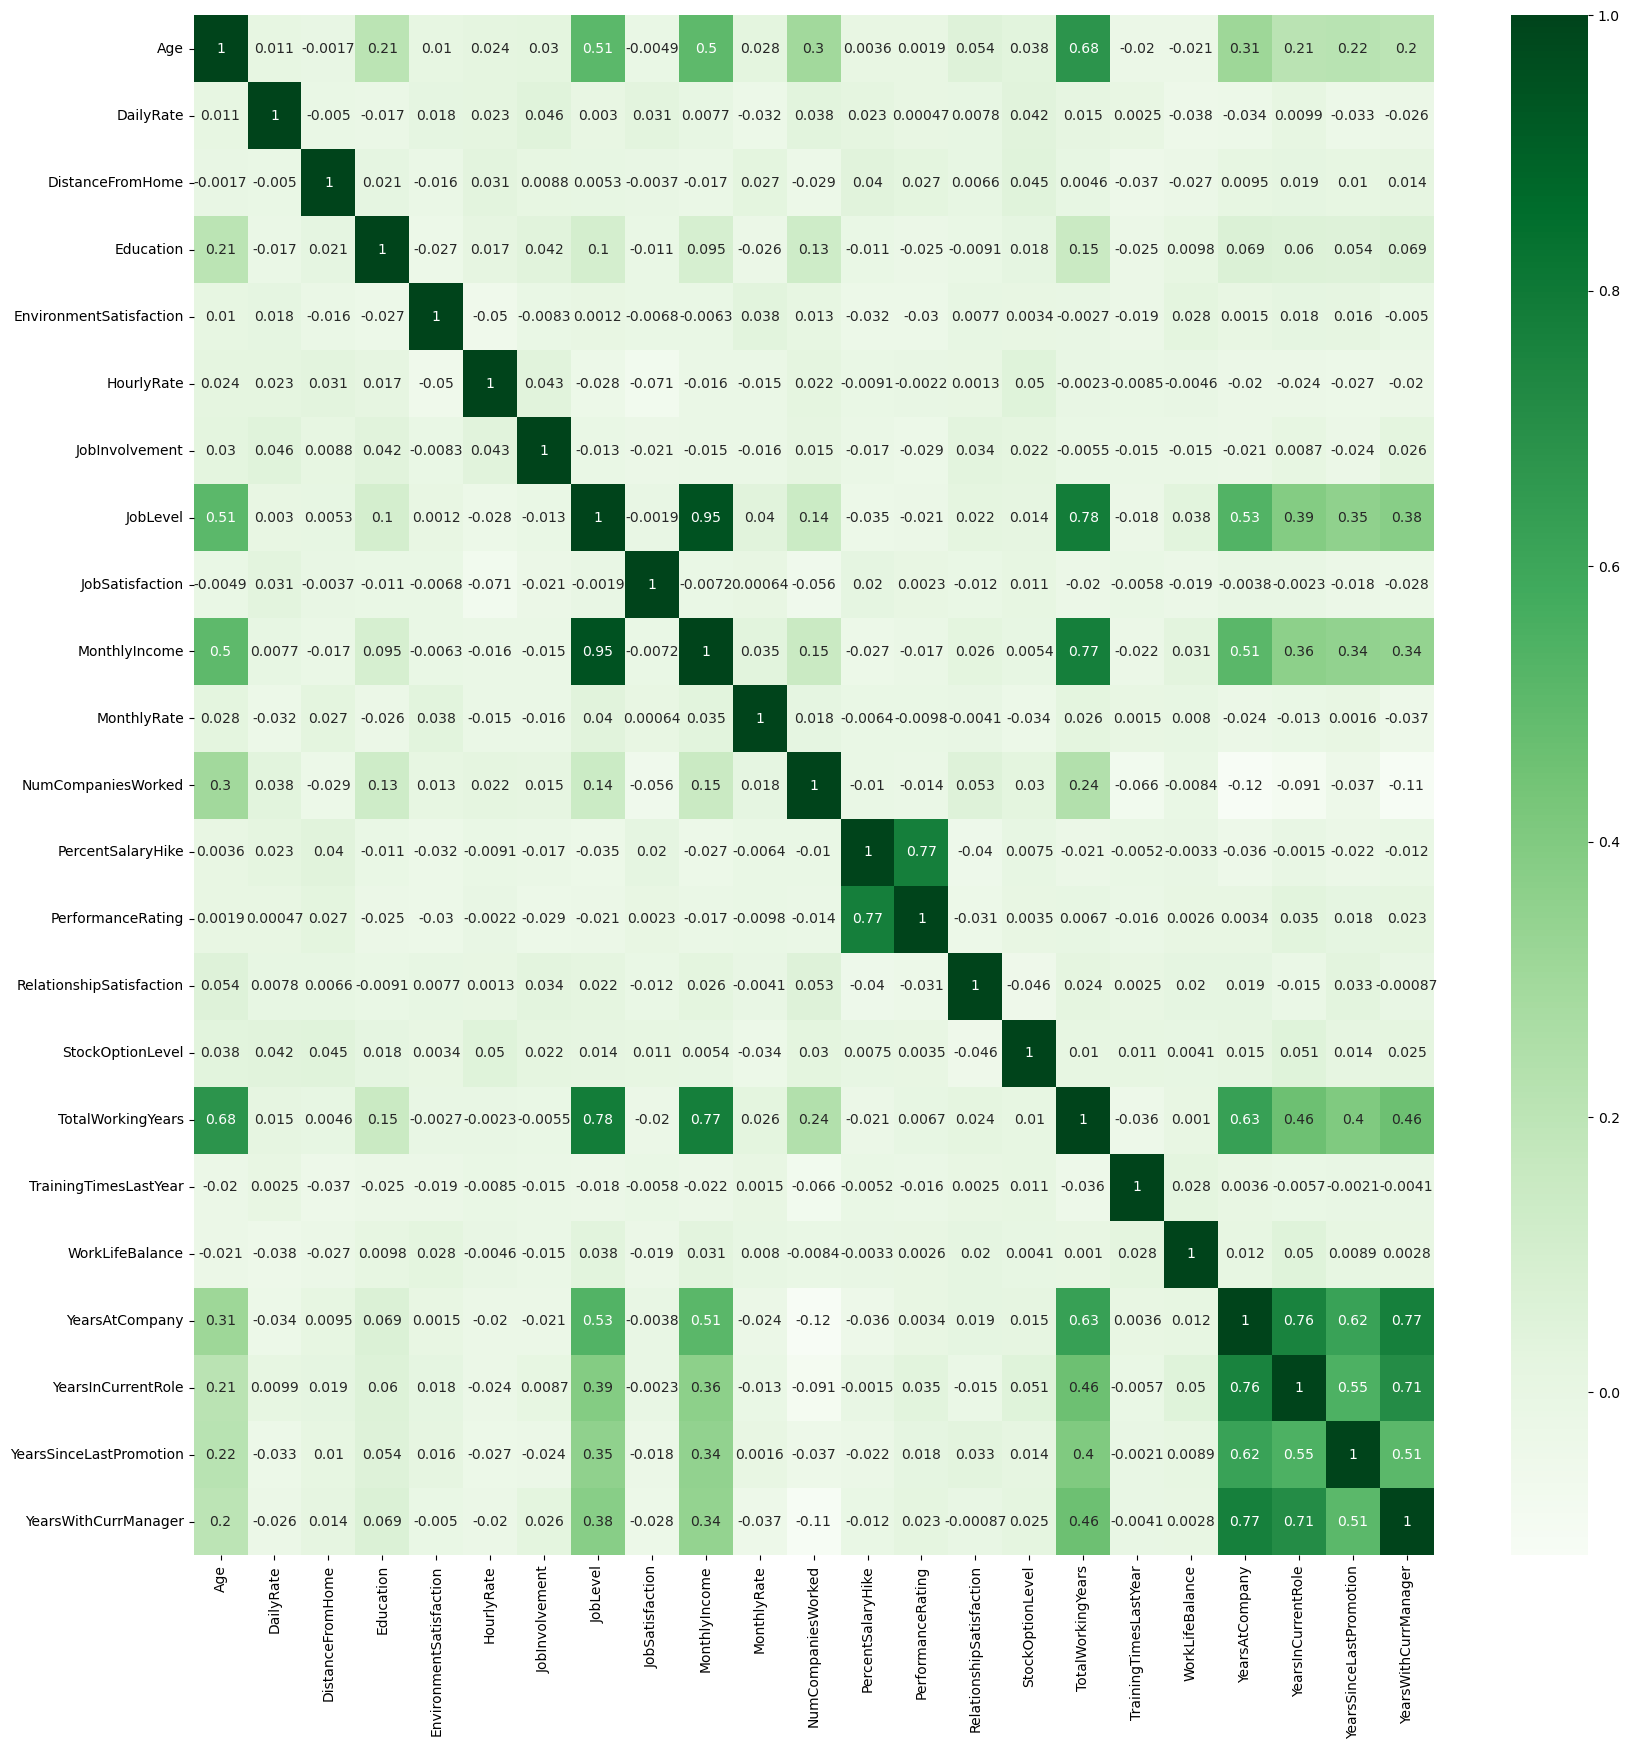

In [27]:
plt.figure(figsize=(20,20))
sns.heatmap(dfcor,annot=True,cmap='Greens')

In above heatmap we can see that:
1.) years with company and years with current manager are highly correlated with each other.
2.) years in current role and years with current manager are highly correlated.
3.) years in current role and years in company are highly correlated.
4.) Years in company and years since last promotion are highly correlated.
5.) years in company and total years of exoperience are highly correlated.
6.) Years at company and job level, year in company and Monthly income are correlated.
7.) total working years is highly correlated with job level,monthly income and Age.
8.) Monthly income is very highly correlated with Job role.
9.) Percentage hike in salary and performance rating are highly correlated.


Age                            Axes(0.125,0.786098;0.168478x0.0939024)
DailyRate                   Axes(0.327174,0.786098;0.168478x0.0939024)
DistanceFromHome            Axes(0.529348,0.786098;0.168478x0.0939024)
Education                   Axes(0.731522,0.786098;0.168478x0.0939024)
EnvironmentSatisfaction        Axes(0.125,0.673415;0.168478x0.0939024)
HourlyRate                  Axes(0.327174,0.673415;0.168478x0.0939024)
JobInvolvement              Axes(0.529348,0.673415;0.168478x0.0939024)
JobLevel                    Axes(0.731522,0.673415;0.168478x0.0939024)
JobSatisfaction                Axes(0.125,0.560732;0.168478x0.0939024)
MonthlyIncome               Axes(0.327174,0.560732;0.168478x0.0939024)
MonthlyRate                 Axes(0.529348,0.560732;0.168478x0.0939024)
NumCompaniesWorked          Axes(0.731522,0.560732;0.168478x0.0939024)
PercentSalaryHike              Axes(0.125,0.448049;0.168478x0.0939024)
PerformanceRating           Axes(0.327174,0.448049;0.168478x0.0939024)
Relati

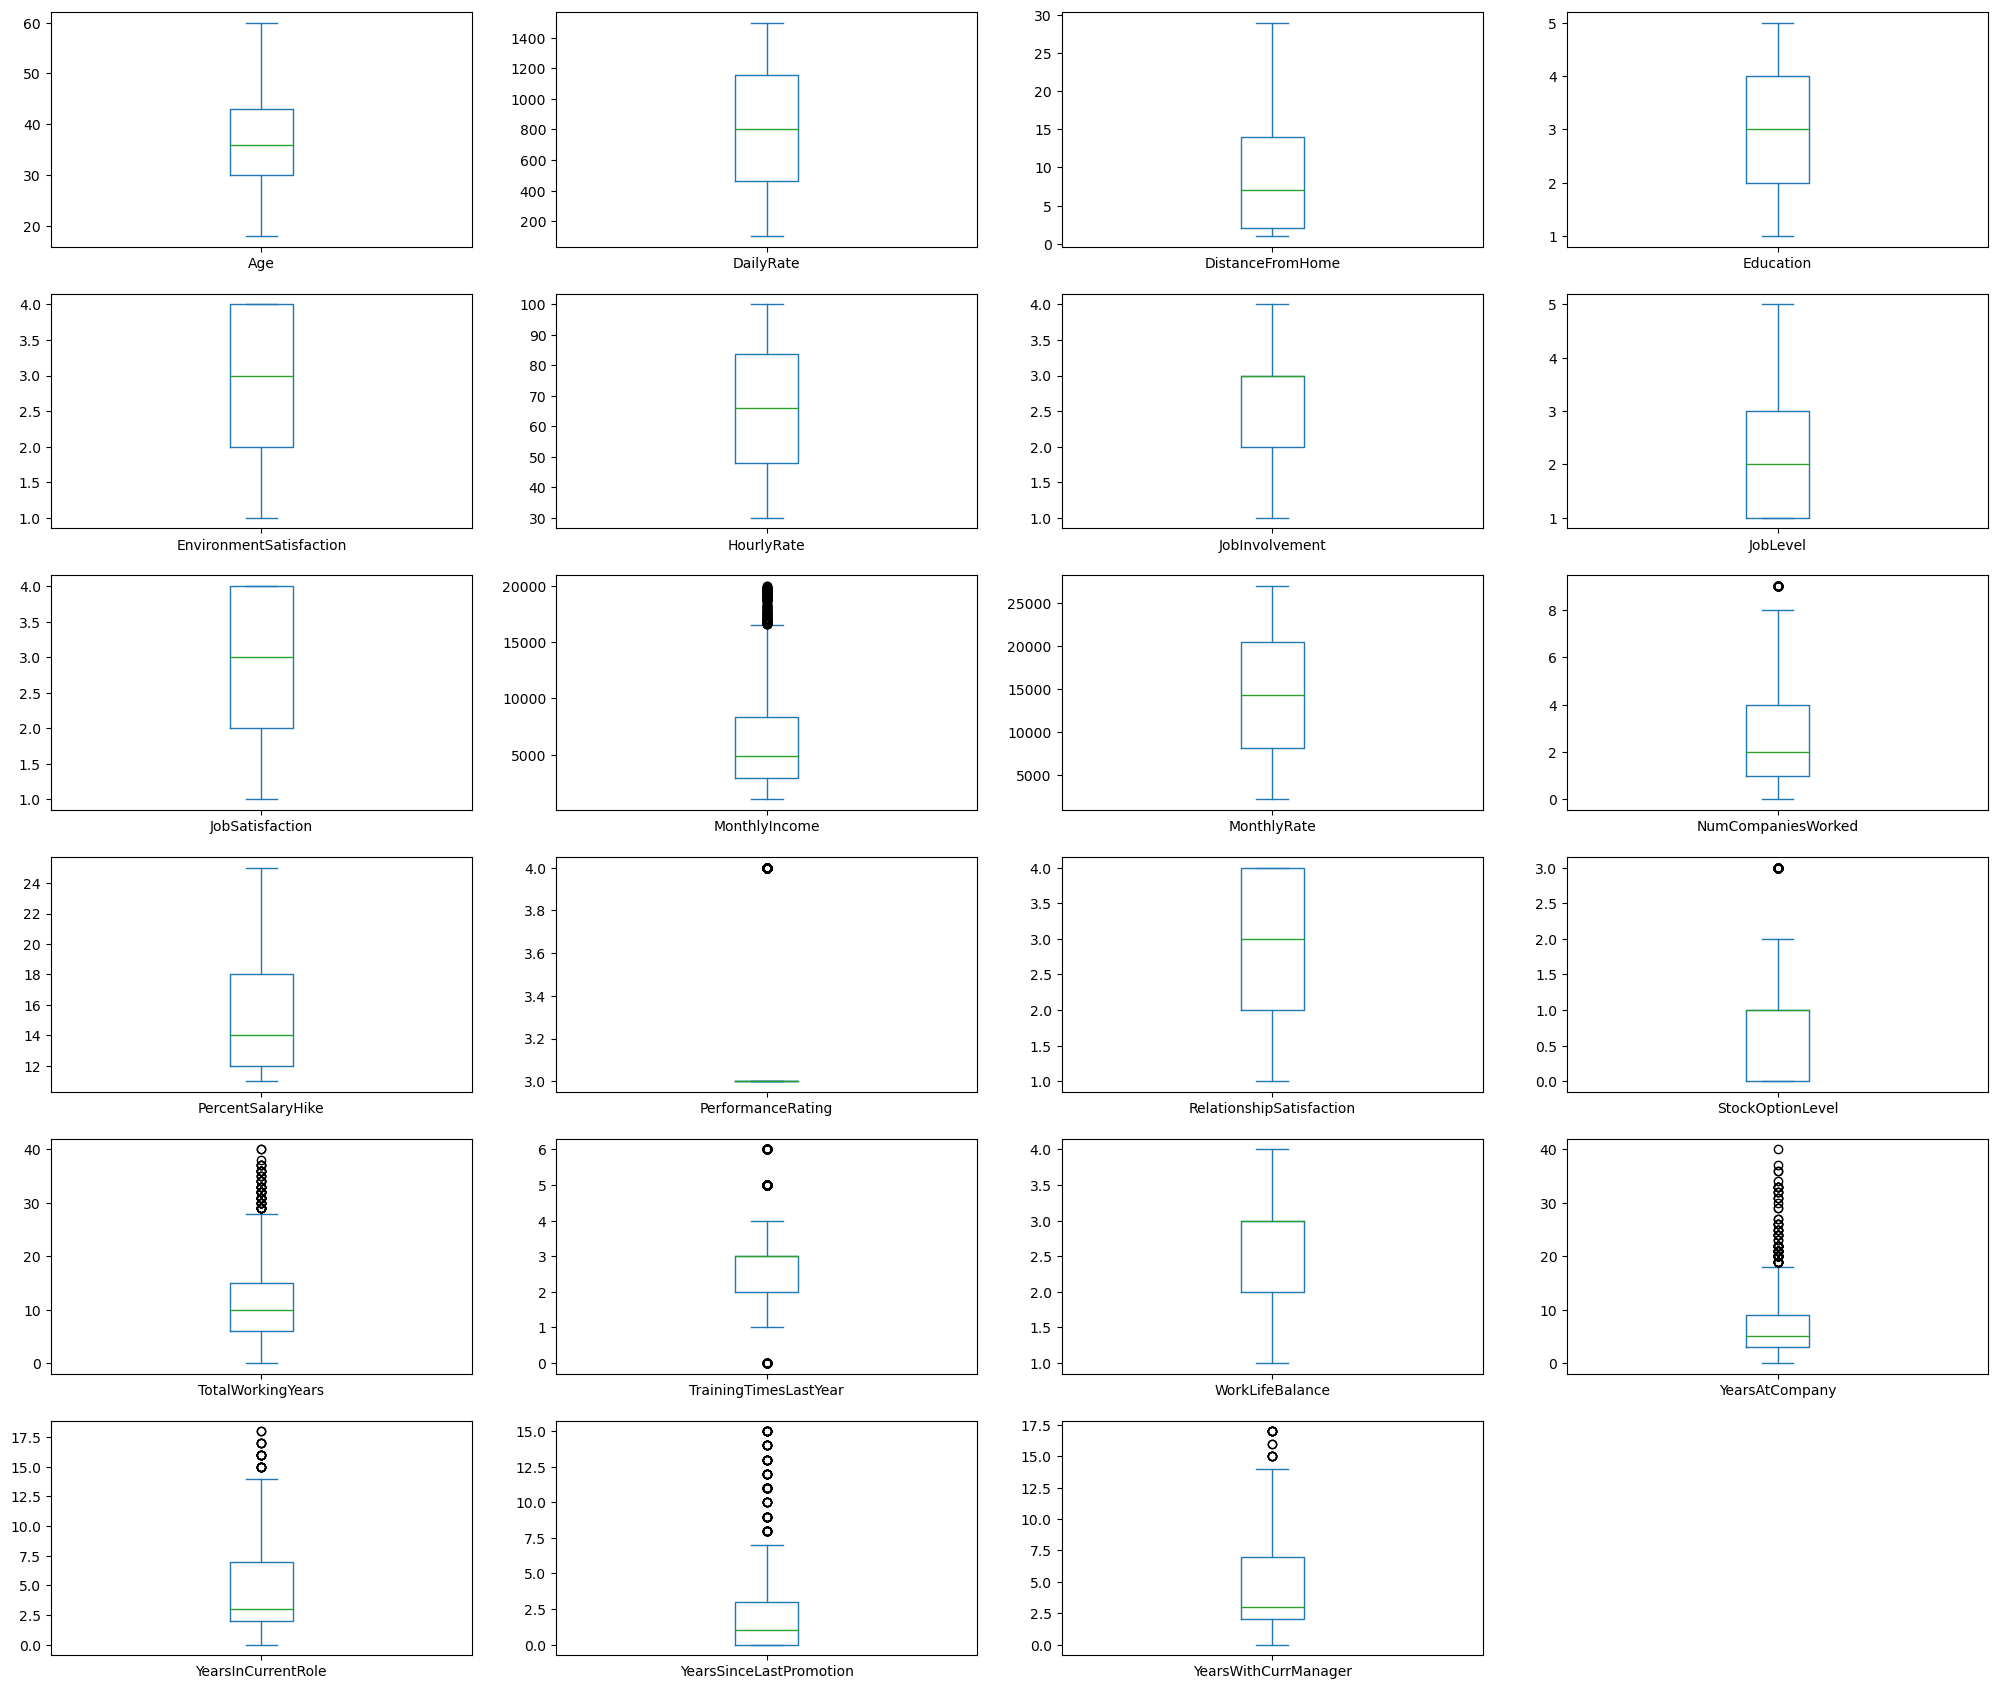

In [28]:
df.plot(kind='box',subplots=True,layout=(7,4),figsize=(25,25))

Above box plots shows the presence of certain outliers in years at the compoany, total working experience,years since last promotion and monthly income

In [29]:
#removing outliers from bmi
z=np.abs(zscore(df[['TotalWorkingYears','YearsAtCompany','MonthlyIncome']]))
z

TotalWorkingYears  YearsAtCompany  MonthlyIncome
0              0.421642        0.164613       0.108350
1              0.164511        0.488508       0.291719
2              0.550208        1.144294       0.937654
3              0.421642        0.161947       0.763634
4              0.678774        0.817734       0.644858
...                 ...             ...            ...
1465           0.735447        0.327893       0.835451
1466           0.293077        0.001333       0.741140
1467           0.678774        0.164613       0.076690
1468           0.735447        0.325228       0.236474
1469           0.678774        0.491174       0.445978

[1470 rows x 3 columns]

In [30]:
np.where(z>3)

(array([  62,   85,   98,   98,  126,  126,  187,  190,  237,  270,  270,
         401,  411,  425,  445,  473,  477,  561,  592,  595,  595,  624,
         653,  677,  749,  861,  894,  914,  918,  956,  962, 1043, 1086,
        1111, 1116, 1116, 1135, 1138, 1184, 1301, 1401], dtype=int64),
 array([1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0,
        1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0],
       dtype=int64))

In [31]:
df1=df[(z<3).all(axis=1)]
df1

Age Attrition     BusinessTravel  DailyRate              Department  \
0      41       Yes      Travel_Rarely       1102                   Sales   
1      49        No  Travel_Frequently        279  Research & Development   
2      37       Yes      Travel_Rarely       1373  Research & Development   
3      33        No  Travel_Frequently       1392  Research & Development   
4      27        No      Travel_Rarely        591  Research & Development   
...   ...       ...                ...        ...                     ...   
1465   36        No  Travel_Frequently        884  Research & Development   
1466   39        No      Travel_Rarely        613  Research & Development   
1467   27        No      Travel_Rarely        155  Research & Development   
1468   49        No  Travel_Frequently       1023                   Sales   
1469   34        No      Travel_Rarely        628  Research & Development   

      DistanceFromHome  Education EducationField  EnvironmentSatisfaction  \
0                    1          2  Life Sciences                        2   
1                    8          1  Life Sciences                        3   
2                    2          2          Other                        4   
3                    3          4  Life Sciences                        4   
4                    2          1        Medical                        1   
...                ...        ...            ...                      ...   
1465                23          2        Medical                        3   
1466                 6          1        Medical                        4   
1467                 4          3  Life Sciences                        2   
1468                 2          3        Medical                        4   
1469                 8          3        Medical                        2   

      Gender  ...  PerformanceRating  RelationshipSatisfaction  \
0     Female  ...                  3                         1   
1       Male  ...                  4                         4   
2       Male  ...                  3                         2   
3     Female  ...                  3                         3   
4       Male  ...                  3                         4   
...      ...  ...                ...                       ...   
1465    Male  ...                  3                         3   
1466    Male  ...                  3                         1   
1467    Male  ...                  4                         2   
1468    Male  ...                  3                         4   
1469    Male  ...                  3                         1   

      StockOptionLevel TotalWorkingYears  TrainingTimesLastYear  \
0                    0                 8                      0   
1                    1                10                      3   
2                    0                 7                      3   
3                    0                 8                      3   
4                    1                 6                      3   
...                ...               ...                    ...   
1465                 1                17                      3   
1466                 1                 9                      5   
1467                 1                 6                      0   
1468                 0                17                      3   
1469                 0                 6                      3   

     WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                  1               6                   4   
1                  3              10                   7   
2                  3               0                   0   
3                  3               8                   7   
4                  3               2                   2   
...              ...             ...                 ...   
1465               3               5                   2   
1466               3               7                   7   
1467              

In [32]:
print("Data_Loss= ",((df.shape[0]-df1.shape[0])/df.shape[0]))

Data_Loss=  0.024489795918367346


Above we can see that after removing the outliers the data loss is significantly low

Checking for skewness

In [33]:
#Encoding categorical columns df
from sklearn.preprocessing import OrdinalEncoder
OE=OrdinalEncoder()
for i in df1.columns:
    if df1[i].dtype=='object':
        df1[i]=OE.fit_transform(df1[i].values.reshape(-1,1))
        
df1

Age  Attrition  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0      41        1.0             2.0       1102         2.0                 1   
1      49        0.0             1.0        279         1.0                 8   
2      37        1.0             2.0       1373         1.0                 2   
3      33        0.0             1.0       1392         1.0                 3   
4      27        0.0             2.0        591         1.0                 2   
...   ...        ...             ...        ...         ...               ...   
1465   36        0.0             1.0        884         1.0                23   
1466   39        0.0             2.0        613         1.0                 6   
1467   27        0.0             2.0        155         1.0                 4   
1468   49        0.0             1.0       1023         2.0                 2   
1469   34        0.0             2.0        628         1.0                 8   

      Education  EducationField  EnvironmentSatisfaction  Gender  ...  \
0             2             1.0                        2     0.0  ...   
1             1             1.0                        3     1.0  ...   
2             2             4.0                        4     1.0  ...   
3             4             1.0                        4     0.0  ...   
4             1             3.0                        1     1.0  ...   
...         ...             ...                      ...     ...  ...   
1465          2             3.0                        3     1.0  ...   
1466          1             3.0                        4     1.0  ...   
1467          3             1.0                        2     1.0  ...   
1468          3             3.0                        4     1.0  ...   
1469          3             3.0                        2     1.0  ...   

      PerformanceRating  RelationshipSatisfaction  StockOptionLevel  \
0                     3                         1                 0   
1                     4                         4                 1   
2                     3                         2                 0   
3                     3                         3                 0   
4                     3                         4                 1   
...                 ...                       ...               ...   
1465                  3                         3                 1   
1466                  3                         1                 1   
1467                  4                         2                 1   
1468                  3                         4                 0   
1469                  3                         1                 0   

      TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
0                     8                      0                1   
1                    10                      3                3   
2                     7                      3                3   
3                     8                      3                3   
4                     6                      3                3   
...                 ...                    ...              ...   
1465                 17                      3                3   
1466                  9                      5                3   
1467                  6                      0                3   
1468                 17                      3                2   
1469                  6                      3                4   

      YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
0                  6                   4                        0   
1                 10                   7                        1   
2                  0                   0                        0   
3                  8                   7                        3   
4                  2                   2                        2   
...              ...                 ...                      ...   
1465           

Above we have encoded the categorical columns into numerical 

In [34]:
#Now we will check for skewness df1
df1.skew()

Age                         0.431254
Attrition                   1.831811
BusinessTravel             -1.434820
DailyRate                  -0.016112
Department                  0.190885
DistanceFromHome            0.958114
Education                  -0.295793
EducationField              0.549677
EnvironmentSatisfaction    -0.319538
Gender                     -0.401559
HourlyRate                 -0.029655
JobInvolvement             -0.503247
JobLevel                    1.073027
JobRole                    -0.376522
JobSatisfaction            -0.339787
MaritalStatus              -0.151979
MonthlyIncome               1.455145
MonthlyRate                 0.031259
NumCompaniesWorked          1.031988
Over18                      0.000000
OverTime                    0.975287
PercentSalaryHike           0.815397
PerformanceRating           1.925397
RelationshipSatisfaction   -0.299523
StockOptionLevel            0.960450
TotalWorkingYears           0.940101
TrainingTimesLastYear       0.566330
W

In [35]:
from scipy.stats import yeojohnson,boxcox        

In [36]:
df1['JobInvolvement']=yeojohnson(df1['JobInvolvement'],3)

In [37]:
df1['JobLevel']=np.cbrt(df1['JobLevel'])

In [38]:
df1['PercentSalaryHike']=np.cbrt(df1['PercentSalaryHike'])

In [39]:
df1['MonthlyIncome']=np.cbrt(df1['MonthlyIncome'])

In [40]:
df1['NumCompaniesWorked']=np.cbrt(df1['NumCompaniesWorked'])

In [41]:
df1['StockOptionLevel']=np.cbrt(df1['StockOptionLevel'])

In [42]:
df1['YearsAtCompany']=np.cbrt(df1['YearsAtCompany'])

In [43]:
df1['YearsSinceLastPromotion']=np.cbrt(df1['YearsSinceLastPromotion'])

In [44]:
df1.skew()

Age                         0.431254
Attrition                   1.831811
BusinessTravel             -1.434820
DailyRate                  -0.016112
Department                  0.190885
DistanceFromHome            0.958114
Education                  -0.295793
EducationField              0.549677
EnvironmentSatisfaction    -0.319538
Gender                     -0.401559
HourlyRate                 -0.029655
JobInvolvement              0.670500
JobLevel                    0.480550
JobRole                    -0.376522
JobSatisfaction            -0.339787
MaritalStatus              -0.151979
MonthlyIncome               0.707149
MonthlyRate                 0.031259
NumCompaniesWorked         -0.698591
Over18                      0.000000
OverTime                    0.975287
PercentSalaryHike           0.596447
PerformanceRating           1.925397
RelationshipSatisfaction   -0.299523
StockOptionLevel           -0.137720
TotalWorkingYears           0.940101
TrainingTimesLastYear       0.566330
W

In [45]:
dfcorr=df1.corr()

In [46]:
dfcorr['Attrition'].sort_values(ascending=False)

Attrition                   1.000000
OverTime                    0.254515
MaritalStatus               0.164073
DistanceFromHome            0.081511
JobRole                     0.068454
Department                  0.065087
NumCompaniesWorked          0.049064
Gender                      0.036980
EducationField              0.022918
MonthlyRate                 0.015296
PerformanceRating           0.006577
BusinessTravel             -0.003866
HourlyRate                 -0.006615
PercentSalaryHike          -0.014752
Education                  -0.030505
RelationshipSatisfaction   -0.051555
DailyRate                  -0.052820
YearsSinceLastPromotion    -0.057161
TrainingTimesLastYear      -0.062305
WorkLifeBalance            -0.066624
EnvironmentSatisfaction    -0.107391
JobSatisfaction            -0.113010
JobInvolvement             -0.115075
YearsWithCurrManager       -0.157472
Age                        -0.163270
YearsInCurrentRole         -0.169486
TotalWorkingYears          -0.186708
M

In [47]:
#spliting the variables
x=df1.drop('Attrition',axis=1)
y=df1['Attrition']

In [48]:
y.shape

(1434,)

In [49]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
#df
x=pd.DataFrame(scaler.fit_transform(x),columns=x.columns)
x

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0     0.504883        0.591425   0.733129    1.407209         -1.012284   
1     1.407068       -0.912305  -1.305603   -0.498303         -0.147418   
2     0.053791        0.591425   1.404449   -0.498303         -0.888731   
3    -0.397301       -0.912305   1.451516   -0.498303         -0.765179   
4    -1.073939        0.591425  -0.532718   -0.498303         -0.888731   
...        ...             ...        ...         ...               ...   
1429 -0.058982       -0.912305   0.193100   -0.498303          1.705865   
1430  0.279337        0.591425  -0.478220   -0.498303         -0.394523   
1431 -1.073939        0.591425  -1.612775   -0.498303         -0.641627   
1432  1.407068       -0.912305   0.537431    1.407209         -0.888731   
1433 -0.284528        0.591425  -0.441062   -0.498303         -0.147418   

      Education  EducationField  EnvironmentSatisfaction    Gender  \
0     -0.882323       -0.938359                -0.660615 -1.220485   
1     -1.863898       -0.938359                 0.255557  0.819346   
2     -0.882323        1.309313                 1.171728  0.819346   
3      1.080828       -0.938359                 1.171728 -1.220485   
4     -1.863898        0.560089                -1.576786  0.819346   
...         ...             ...                      ...       ...   
1429  -0.882323        0.560089                 0.255557  0.819346   
1430  -1.863898        0.560089                 1.171728  0.819346   
1431   0.099253       -0.938359                -0.660615  0.819346   
1432   0.099253        0.560089                 1.171728  0.819346   
1433   0.099253        0.560089                -0.660615  0.819346   

      HourlyRate  ...  PerformanceRating  RelationshipSatisfaction  \
0       1.385422  ...          -0.425698                 -1.585756   
1      -0.240916  ...           2.349081                  1.196431   
2       1.286856  ...          -0.425698                 -0.658361   
3      -0.487331  ...          -0.425698                  0.269035   
4      -1.275859  ...          -0.425698                  1.196431   
...          ...  ...                ...                       ...   
1429   -1.226576  ...          -0.425698                  0.269035   
1430   -1.177293  ...          -0.425698                 -1.585756   
1431    1.040441  ...           2.349081                 -0.658361   
1432   -0.142350  ...          -0.425698                  1.196431   
1433    0.794026  ...          -0.425698                 -1.585756   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0            -1.126449          -0.388894              -2.178097   
1             0.675936          -0.102761               0.155695   
2            -1.126449          -0.531961               0.155695   
3            -1.126449          -0.388894               0.155695   
4             0.675936          -0.675028               0.155695   
...                ...                ...                    ...   
1429          0.675936           0.898707               0.155695   
1430          0.675936          -0.245828               1.711555   
1431          0.675936          -0.675028              -2.178097   
1432         -1.126449           0.898707               0.155695   
1433         -1.126449          -0.675028               0.155695   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0           -2.494348        0.182456           -0.034181   
1            0.334355        0.784228            0.810915   
2            0.334355       -3.059309           -1.160976   
3            0.334355        0.508715            0.810915   
4            0.334355       -0.811595           -0.597578   
...               ...             ...                 ...   
1429         0.334355       -0.008691           -0.597578   
1430         0.334355        0.353383            0.810915   
1431         0.334355        0.182456           -0.597578   
1

In [50]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [51]:
vif=pd.DataFrame()
vif['Features']=x.columns
vif['Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

Features    Values
0                        Age  1.878425
1             BusinessTravel  1.016022
2                  DailyRate  1.026417
3                 Department  2.066324
4           DistanceFromHome  1.013771
5                  Education  1.058101
6             EducationField  1.017606
7    EnvironmentSatisfaction  1.023354
8                     Gender  1.024724
9                 HourlyRate  1.023133
10            JobInvolvement  1.019285
11                  JobLevel  8.580372
12                   JobRole  1.958810
13           JobSatisfaction  1.021097
14             MaritalStatus  2.428581
15             MonthlyIncome  8.151344
16               MonthlyRate  1.016183
17        NumCompaniesWorked  1.249457
18                    Over18       NaN
19                  OverTime  1.029715
20         PercentSalaryHike  2.239804
21         PerformanceRating  2.229217
22  RelationshipSatisfaction  1.020546
23          StockOptionLevel  2.402113
24         TotalWorkingYears  3.837977
25     TrainingTimesLastYear  1.024414
26           WorkLifeBalance  1.021055
27            YearsAtCompany  4.009709
28        YearsInCurrentRole  2.977004
29   YearsSinceLastPromotion  1.463610
30      YearsWithCurrManager  2.959945

We can see that vif for monthly income and JobLevel hence we will drop Job Level

In [52]:
x.drop('JobLevel',axis=1,inplace=True)
x

Age  BusinessTravel  DailyRate  Department  DistanceFromHome  \
0     0.504883        0.591425   0.733129    1.407209         -1.012284   
1     1.407068       -0.912305  -1.305603   -0.498303         -0.147418   
2     0.053791        0.591425   1.404449   -0.498303         -0.888731   
3    -0.397301       -0.912305   1.451516   -0.498303         -0.765179   
4    -1.073939        0.591425  -0.532718   -0.498303         -0.888731   
...        ...             ...        ...         ...               ...   
1429 -0.058982       -0.912305   0.193100   -0.498303          1.705865   
1430  0.279337        0.591425  -0.478220   -0.498303         -0.394523   
1431 -1.073939        0.591425  -1.612775   -0.498303         -0.641627   
1432  1.407068       -0.912305   0.537431    1.407209         -0.888731   
1433 -0.284528        0.591425  -0.441062   -0.498303         -0.147418   

      Education  EducationField  EnvironmentSatisfaction    Gender  \
0     -0.882323       -0.938359                -0.660615 -1.220485   
1     -1.863898       -0.938359                 0.255557  0.819346   
2     -0.882323        1.309313                 1.171728  0.819346   
3      1.080828       -0.938359                 1.171728 -1.220485   
4     -1.863898        0.560089                -1.576786  0.819346   
...         ...             ...                      ...       ...   
1429  -0.882323        0.560089                 0.255557  0.819346   
1430  -1.863898        0.560089                 1.171728  0.819346   
1431   0.099253       -0.938359                -0.660615  0.819346   
1432   0.099253        0.560089                 1.171728  0.819346   
1433   0.099253        0.560089                -0.660615  0.819346   

      HourlyRate  ...  PerformanceRating  RelationshipSatisfaction  \
0       1.385422  ...          -0.425698                 -1.585756   
1      -0.240916  ...           2.349081                  1.196431   
2       1.286856  ...          -0.425698                 -0.658361   
3      -0.487331  ...          -0.425698                  0.269035   
4      -1.275859  ...          -0.425698                  1.196431   
...          ...  ...                ...                       ...   
1429   -1.226576  ...          -0.425698                  0.269035   
1430   -1.177293  ...          -0.425698                 -1.585756   
1431    1.040441  ...           2.349081                 -0.658361   
1432   -0.142350  ...          -0.425698                  1.196431   
1433    0.794026  ...          -0.425698                 -1.585756   

      StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0            -1.126449          -0.388894              -2.178097   
1             0.675936          -0.102761               0.155695   
2            -1.126449          -0.531961               0.155695   
3            -1.126449          -0.388894               0.155695   
4             0.675936          -0.675028               0.155695   
...                ...                ...                    ...   
1429          0.675936           0.898707               0.155695   
1430          0.675936          -0.245828               1.711555   
1431          0.675936          -0.675028              -2.178097   
1432         -1.126449           0.898707               0.155695   
1433         -1.126449          -0.675028               0.155695   

      WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0           -2.494348        0.182456           -0.034181   
1            0.334355        0.784228            0.810915   
2            0.334355       -3.059309           -1.160976   
3            0.334355        0.508715            0.810915   
4            0.334355       -0.811595           -0.597578   
...               ...             ...                 ...   
1429         0.334355       -0.008691           -0.597578   
1430         0.334355        0.353383            0.810915   
1431         0.334355        0.182456           -0.597578   
1

In [54]:
#Again we will check vif
vif=pd.DataFrame()
vif['Features']=x.columns
vif['Values']=[variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif

Features    Values
0                        Age  1.878346
1             BusinessTravel  1.013026
2                  DailyRate  1.025301
3                 Department  1.970258
4           DistanceFromHome  1.010304
5                  Education  1.058090
6             EducationField  1.016479
7    EnvironmentSatisfaction  1.021682
8                     Gender  1.024433
9                 HourlyRate  1.020757
10            JobInvolvement  1.019263
11                   JobRole  1.933224
12           JobSatisfaction  1.020911
13             MaritalStatus  2.427029
14             MonthlyIncome  2.403154
15               MonthlyRate  1.015746
16        NumCompaniesWorked  1.248618
17                    Over18       NaN
18                  OverTime  1.028882
19         PercentSalaryHike  2.239393
20         PerformanceRating  2.228961
21  RelationshipSatisfaction  1.020523
22          StockOptionLevel  2.401545
23         TotalWorkingYears  3.705779
24     TrainingTimesLastYear  1.023814
25           WorkLifeBalance  1.019496
26            YearsAtCompany  4.007764
27        YearsInCurrentRole  2.976662
28   YearsSinceLastPromotion  1.462427
29      YearsWithCurrManager  2.950713

Now all the values are in range. we will proceed with model building.

As we have seen that there is a big difference in attrition yes and no, we will use OVERSAMPLING technique

In [55]:
from imblearn.over_sampling import SMOTE

In [56]:
SM=SMOTE()
x1,y1=SM.fit_resample(x,y)

In [57]:
#checking value count again
y1.value_counts()

1.0    1201
0.0    1201
Name: Attrition, dtype: int64

MODEL BUILDING

In [58]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier, GradientBoostingClassifier,AdaBoostClassifier,BaggingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import cross_val_score
from sklearn.naive_bayes import GaussianNB

In [59]:
#finding best random state in df1
maxAccu=0
maxRS=0
for i in range(1,200):
    x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=.30,random_state=i)
    RFR=RandomForestClassifier()
    RFR.fit(x_train,y_train)
    pred=RFR.predict(x_test)
    accu=accuracy_score(y_test,pred)
    if accu>maxAccu:
        maxAccu=accu
        maxRS=i
print("Best Accuracy is",maxAccu,"at random state", maxRS)

Best Accuracy is 0.9597780859916782 at random state 192


Again Creating train_test_split

In [60]:
x_train,x_test,y_train,y_test=train_test_split(x1,y1,test_size=0.30,random_state=maxRS)

RANDOM FOREST CLASSIFIER

In [61]:
RFC=RandomForestClassifier()
RFC.fit(x_train,y_train)
predRFC=RFC.predict(x_test)
predRFC
print(accuracy_score(y_test,predRFC))
print(confusion_matrix(y_test,predRFC))
print(classification_report(y_test,predRFC))

0.9542302357836339
[[359  13]
 [ 20 329]]
              precision    recall  f1-score   support

         0.0       0.95      0.97      0.96       372
         1.0       0.96      0.94      0.95       349

    accuracy                           0.95       721
   macro avg       0.95      0.95      0.95       721
weighted avg       0.95      0.95      0.95       721



OBS: The accuracy score using Random Forest Classifier is 95.42%

LOGISTIC REGRESSION

In [62]:
LR=LogisticRegression()
LR.fit(x_train,y_train)
predLR=LR.predict(x_test)
predLR
print(accuracy_score(y_test,predLR))
print(confusion_matrix(y_test,predLR))
print(classification_report(y_test,predLR))

0.812760055478502
[[288  84]
 [ 51 298]]
              precision    recall  f1-score   support

         0.0       0.85      0.77      0.81       372
         1.0       0.78      0.85      0.82       349

    accuracy                           0.81       721
   macro avg       0.81      0.81      0.81       721
weighted avg       0.82      0.81      0.81       721



The accuracy score with Logistic regression is 81.27%

GAUSSIAN NAIVE BAYES

In [63]:
gnb=GaussianNB()
gnb.fit(x_train,y_train)
predgnb=gnb.predict(x_test)
predgnb
print(accuracy_score(y_test,predgnb))
print(confusion_matrix(y_test,predgnb))
print(classification_report(y_test,predgnb))

0.7545076282940361
[[258 114]
 [ 63 286]]
              precision    recall  f1-score   support

         0.0       0.80      0.69      0.74       372
         1.0       0.71      0.82      0.76       349

    accuracy                           0.75       721
   macro avg       0.76      0.76      0.75       721
weighted avg       0.76      0.75      0.75       721



The accuracy score with GAUSSIAN NAIVE BAYES is 75.45%

KNN CLASSIFIER

In [64]:
KNN=KNeighborsClassifier()
KNN.fit(x_train,y_train)
predKNN=KNN.predict(x_test)
predKNN
print(accuracy_score(y_test,predKNN))
print(confusion_matrix(y_test,predKNN))
print(classification_report(y_test,predKNN))

0.7947295423023578
[[228 144]
 [  4 345]]
              precision    recall  f1-score   support

         0.0       0.98      0.61      0.75       372
         1.0       0.71      0.99      0.82       349

    accuracy                           0.79       721
   macro avg       0.84      0.80      0.79       721
weighted avg       0.85      0.79      0.79       721



The accuracy score with KNeighborsClassifier is 79.47%

SUPPORT VECTOR MACHINE CLASSIFIER

In [65]:
svc=SVC()
svc.fit(x_train,y_train)
predsvc=svc.predict(x_test)
predsvc
print(accuracy_score(y_test,predsvc))
print(confusion_matrix(y_test,predsvc))
print(classification_report(y_test,predsvc))

0.9181692094313454
[[331  41]
 [ 18 331]]
              precision    recall  f1-score   support

         0.0       0.95      0.89      0.92       372
         1.0       0.89      0.95      0.92       349

    accuracy                           0.92       721
   macro avg       0.92      0.92      0.92       721
weighted avg       0.92      0.92      0.92       721



The accuracy score with SVC is 91.81%

DECISION TREE CLASSIFIER

In [66]:
dtc=DecisionTreeClassifier()
dtc.fit(x_train,y_train)
preddtc=dtc.predict(x_test)
preddtc
print(accuracy_score(y_test,preddtc))
print(confusion_matrix(y_test,preddtc))
print(classification_report(y_test,preddtc))

0.8515950069348127
[[310  62]
 [ 45 304]]
              precision    recall  f1-score   support

         0.0       0.87      0.83      0.85       372
         1.0       0.83      0.87      0.85       349

    accuracy                           0.85       721
   macro avg       0.85      0.85      0.85       721
weighted avg       0.85      0.85      0.85       721



The accuracy score with DTC is 85.15%

ADABOOST CLASSIFIER

In [67]:
ad=AdaBoostClassifier()
ad.fit(x_train,y_train)
predad=ad.predict(x_test)
predad
print(accuracy_score(y_test,predad))
print(confusion_matrix(y_test,predad))
print(classification_report(y_test,predad))

0.912621359223301
[[340  32]
 [ 31 318]]
              precision    recall  f1-score   support

         0.0       0.92      0.91      0.92       372
         1.0       0.91      0.91      0.91       349

    accuracy                           0.91       721
   macro avg       0.91      0.91      0.91       721
weighted avg       0.91      0.91      0.91       721



The accuracy score with AdaBoost Classifier is 91.26%

GRADIENT BOOSTING CLASSIFIER

In [68]:
gb=GradientBoostingClassifier()
gb.fit(x_train,y_train)
predgb=gb.predict(x_test)
predgb
print(accuracy_score(y_test,predgb))
print(confusion_matrix(y_test,predgb))
print(classification_report(y_test,predgb))

0.9361997226074896
[[354  18]
 [ 28 321]]
              precision    recall  f1-score   support

         0.0       0.93      0.95      0.94       372
         1.0       0.95      0.92      0.93       349

    accuracy                           0.94       721
   macro avg       0.94      0.94      0.94       721
weighted avg       0.94      0.94      0.94       721



The accuracy score with Gradient Boosting Classifier is 93.61%

BAGGING CLASSIFIER

In [69]:
BC=BaggingClassifier()
BC.fit(x_train,y_train)
predBC=BC.predict(x_test)
predBC
print(accuracy_score(y_test,predBC))
print(confusion_matrix(y_test,predBC))
print(classification_report(y_test,predBC))

0.9112343966712899
[[348  24]
 [ 40 309]]
              precision    recall  f1-score   support

         0.0       0.90      0.94      0.92       372
         1.0       0.93      0.89      0.91       349

    accuracy                           0.91       721
   macro avg       0.91      0.91      0.91       721
weighted avg       0.91      0.91      0.91       721



The accuracy score with Bagging Classifier is 91.12%

EXTRA TREES CLASSIFIER

In [70]:
ET=ExtraTreesClassifier()
ET.fit(x_train,y_train)
predET=ET.predict(x_test)
predET
print(accuracy_score(y_test,predET))
print(confusion_matrix(y_test,predET))
print(classification_report(y_test,predET))

0.9764216366158114
[[360  12]
 [  5 344]]
              precision    recall  f1-score   support

         0.0       0.99      0.97      0.98       372
         1.0       0.97      0.99      0.98       349

    accuracy                           0.98       721
   macro avg       0.98      0.98      0.98       721
weighted avg       0.98      0.98      0.98       721



The accuracy score with Extra Trees Classifier is 97.64%

In [71]:
accuracy=pd.DataFrame([['RFC',accuracy_score(y_test,predRFC)],['LR',accuracy_score(y_test,predLR)],['GNB',accuracy_score(y_test,predgnb)],['KNN',accuracy_score(y_test,predKNN)],['SVC',accuracy_score(y_test,predsvc)],['DTC',accuracy_score(y_test,preddtc)],['Adaboost',accuracy_score(y_test,predad)],['Gradient Boosting',accuracy_score(y_test,predgb)],['Bagging',accuracy_score(y_test,predBC)],['ETC',accuracy_score(y_test,predET)]],columns=['Model','Accuracy'])
accuracy

Model  Accuracy
0                RFC  0.954230
1                 LR  0.812760
2                GNB  0.754508
3                KNN  0.794730
4                SVC  0.918169
5                DTC  0.851595
6           Adaboost  0.912621
7  Gradient Boosting  0.936200
8            Bagging  0.911234
9                ETC  0.976422

Here we can see that Extra Trees Classifier is giving us the hughest accuracy. Lets validate the same using Cross Validation Score

CROSS VALIDATION SCORE

In [72]:
#Checking cv score for Random Forest Classifier
score=cross_val_score(RFC,x1,y1)
print(score)
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",accuracy_score(y_test,predRFC)-score.mean())

[0.77962578 0.97297297 0.96875    0.97083333 0.98125   ]
0.9346864171864171
0.07764632140697439
Difference between Accuracy Score and Cross Validation Score is :  0.019543818597216767


In [73]:
#Checking cv score for Logistic regression
score=cross_val_score(LR,x1,y1)
print(score)
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",accuracy_score(y_test,predLR)-score.mean())

[0.77546778 0.81081081 0.78541667 0.78958333 0.81875   ]
0.7960057172557173
0.016196760498542944
Difference between Accuracy Score and Cross Validation Score is :  0.016754338222784715


In [74]:
#Checking cv score for GAUSSIAN NAIVE BAYES
score=cross_val_score(gnb,x1,y1)
print(score)
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",accuracy_score(y_test,predgnb)-score.mean())

[0.70686071 0.75051975 0.72291667 0.73958333 0.75208333]
0.7343927581427582
0.017260897588915233
Difference between Accuracy Score and Cross Validation Score is :  0.020114870151277886


In [75]:
#Checking cv score for KNN CLASSIFIER
score=cross_val_score(KNN,x1,y1)
print(score)
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",accuracy_score(y_test,predKNN)-score.mean())

[0.76507277 0.82328482 0.81041667 0.77708333 0.80208333]
0.7955881843381843
0.021460638300068485
Difference between Accuracy Score and Cross Validation Score is :  -0.000858642035826529


In [76]:
#Checking cv score for SUPPORT VECTOR MACHINE CLASSIFIER
score=cross_val_score(svc,x1,y1)
print(score)
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",accuracy_score(y_test,predsvc)-score.mean())

[0.87941788 0.93555094 0.92708333 0.91875    0.92916667]
0.917993762993763
0.02002188333655975
Difference between Accuracy Score and Cross Validation Score is :  0.00017544643758238276


In [77]:
#Checking cv score for Decision Tree Classifier
score=cross_val_score(dtc,x1,y1)
print(score)
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",accuracy_score(y_test,preddtc)-score.mean())

[0.74012474 0.88149688 0.88333333 0.89375    0.89791667]
0.8593243243243244
0.0599184307399887
Difference between Accuracy Score and Cross Validation Score is :  -0.0077293173895116585


In [78]:
#Checking cv score for ADABOOST CLASSIFIER
score=cross_val_score(ad,x1,y1)
print(score)
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",accuracy_score(y_test,predad)-score.mean())

[0.62162162 0.93762994 0.91041667 0.92916667 0.93541667]
0.8668503118503118
0.12298745163565868
Difference between Accuracy Score and Cross Validation Score is :  0.045771047372989204


In [79]:
#Checking cv score for Gradient Boosting Classifier
score=cross_val_score(gb,x1,y1)
print(score)
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",accuracy_score(y_test,predgb)-score.mean())

[0.58004158 0.96465696 0.95416667 0.95833333 0.96875   ]
0.8851897089397089
0.15265684264391394
Difference between Accuracy Score and Cross Validation Score is :  0.051010013667780685


In [80]:
#Checking cv score for Extra Trees Classifier
score=cross_val_score(ET,x1,y1)
print(score)
print(score.mean())
print(score.std())
print("Difference between Accuracy Score and Cross Validation Score is : ",accuracy_score(y_test,predET)-score.mean())

[0.93762994 0.96881497 0.97083333 0.96458333 0.99166667]
0.9667056479556478
0.017288381222412122
Difference between Accuracy Score and Cross Validation Score is :  0.009715988660163544


The difference between Accuracy Score and Cross Validation Score in Extra Trees Classifier is (0.00971) and the CV SCORE is 96.67%. Hence we can conclude that Extra Trees Classifier is our best model

HYPERPARAMETER TUNING

In [81]:
from sklearn.model_selection import GridSearchCV

In [82]:
params={'criterion':['gini','entropy'],'n_estimators':[100,200,300],'random_state':[10,16,42,50,100,115]}

In [83]:
GCV=GridSearchCV(ET,params,cv=5)

In [84]:
GCV.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=ExtraTreesClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'n_estimators': [100, 200, 300],
                         'random_state': [10, 16, 42, 50, 100, 115]})

In [85]:
GCV.best_params_

{'criterion': 'gini', 'n_estimators': 300, 'random_state': 10}

In [91]:
Final_model=ExtraTreesClassifier(criterion='gini',n_estimators=300,random_state=10)
Final_model.fit(x_train,y_train)
finalpred=Final_model.predict(x_test)
acc=accuracy_score(y_test,finalpred)
print(acc*100)

97.78085991678225


here we can see that after hyperparameter tuning the accuracy of our final model has increased.

PLOTTING ROC AND COMPARING AUC FOR ALL THE MODELS USED

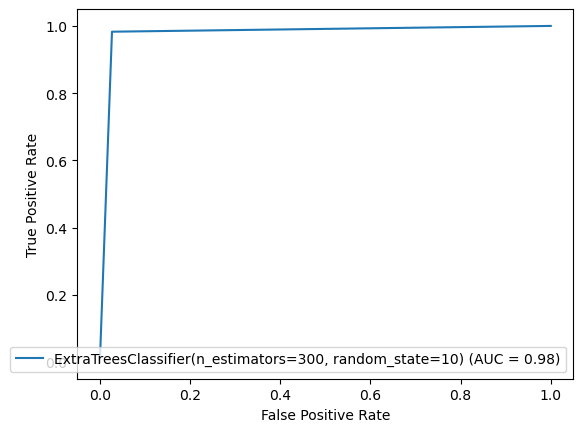

In [92]:
from sklearn import metrics
fpr,tpr,thresholds=metrics.roc_curve(y_test,finalpred)
roc_auc=metrics.auc(fpr,tpr)
display=metrics.RocCurveDisplay(fpr=fpr,tpr=tpr,roc_auc=roc_auc,estimator_name=Final_model)
display.plot()

Here we have plotted the ROC curvefor the final model and the AUC value for the best model is 98%

SAVING THE MODEL

In [93]:
import joblib
joblib.dump(Final_model,'HR Analytics Project.pkl')

['HR Analytics Project.pkl']

PREDICTING THE SAVED MODEL

In [94]:
#Lets load the saved model and get predictions
model=joblib.load("HR Analytics Project.pkl")

#prediction
prediction=model.predict(x_test)

In [95]:
a=np.array(y_test)
df=pd.DataFrame()
df["Predicted"]=prediction
df["Original"]=a
df

Predicted  Original
0          0.0       0.0
1          0.0       0.0
2          1.0       1.0
3          0.0       0.0
4          0.0       0.0
..         ...       ...
716        0.0       0.0
717        1.0       1.0
718        0.0       0.0
719        1.0       0.0
720        0.0       0.0

[721 rows x 2 columns]

Here we can see that the predicted values are almost same as original values

In [96]:
#FINISH